# <h1> Primera aproximación a una herramienta que permite la predicción de la cantidad de heridos en un accidente de tránsito.</h1>


Objetivo: Desarrollar una herramienta a través de la cual se puedan predecir la cantidad de heridos para un accidente de tránsito, como primera etapa de un proyecto que a largo plazo permita programar de una forma más eficiente los recursos de atención de emergencias en el caso de los accidentes de tránsito.



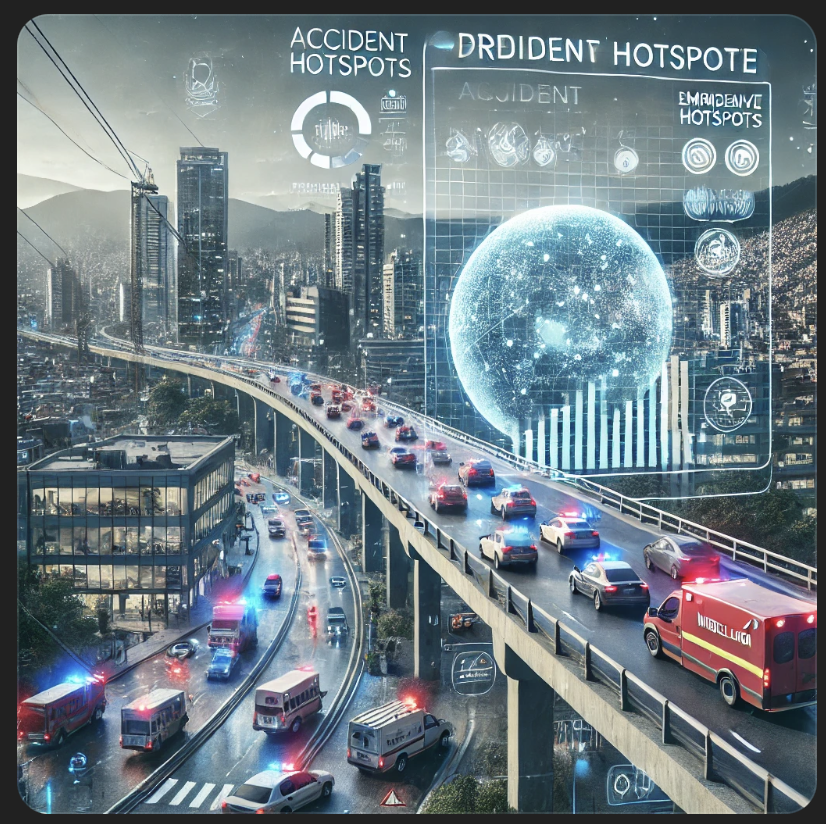


# PIPELINE ALGORITMOS DE REGRESIÓN

# 1. PIPELINE/RECOLECCIÓN DE DATOS

1. Importar y Leer el DataSet

In [ ]:
# Carga de librerías necesarias para el procesamiento de la información base, así como las librerías requeridas
# para graficar y generar los modelos de predicción.

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import scipy.stats as stats

from scipy import stats
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV

from sklearn.model_selection import cross_val_score, cross_validate

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot, PredictionError

import warnings
warnings.filterwarnings("ignore")

# **Actividades Obtencion de la informacion:**




*   Obtener data de accidentalidad y carros involucrados
*   Creacion de nuevas columnas para almacenar informacion de totales
*   Estandarizacion de los nomrbes de los colores
*   Revision de valores por columna

In [ ]:
# carga del archivo de datos.
co2 = pd.read_csv('/content/informacion_vehiculos_personas_v3.csv', delimiter=';')

# Hacer una copia del DataSet original
df = co2.copy()

# 2. PIPELINE/ANÁLISIS EXPLORATORIO DE DATOS (EDA)





# Comprendiendo los Datos

In [ ]:
# Revisar la carga del archivo
df.head()

codigo  fecha_registro  diseno  area  sector  zona  clima  carac_viaRecCur  \
0    1380           45227     2.0   4.0     1.0   NaN      5              1.0   
1    1357           45223     2.0   4.0     1.0   1.0      5              1.0   
2    1370           45225     2.0   4.0     3.0   NaN      5              1.0   
3    1435           45233    11.0   4.0     1.0   NaN      5              1.0   
4    1424           45232    11.0   3.0     3.0   NaN      5              1.0   

   carc_planaLom  sentido_via  ...  modelo  tiene_revision  tiene_seguro  \
0            2.0          2.0  ...  2023.0               0          TRUE   
1            2.0          1.0  ...  2016.0            TRUE          TRUE   
2            1.0          2.0  ...  2020.0            TRUE          TRUE   
3            2.0          2.0  ...  2021.0               0          TRUE   
4            2.0          2.0  ...  2013.0            TRUE          TRUE   

   lugar_impacto impacto_ppal  sexo  gravedad  porta_licencia  \
0              0            0     1         2            TRUE   
1              2            1     1         0            TRUE   
2              1            1     1         2            TRUE   
3              3            9     1         0               0   
4              2            7     1         0            TRUE   

   categoria_licencia  porta_casco  
0                  A2            0  
1                  B1            0  
2                  A2        FALSE  
3                  B1            0  
4                  C2            0  

[5 rows x 35 columns]

In [ ]:
# Mostrar 5 filas de manera aleatoria
df.sample(5)

codigo  fecha_registro  diseno  area  sector  zona  clima  \
2857    5675           45504    11.0   4.0     1.0   NaN      5   
1257    3368           45359    11.0   4.0     2.0   NaN      5   
74      1605           45258    11.0   4.0     1.0   NaN      5   
1573    3788           45388    11.0   4.0     1.0   NaN      5   
344     1900           45278    11.0   4.0     3.0   NaN      5   

      carac_viaRecCur  carc_planaLom  sentido_via  ...  modelo  \
2857              1.0            1.0          2.0  ...  2014.0   
1257              1.0            1.0          1.0  ...  2021.0   
74                1.0            1.0          1.0  ...  2023.0   
1573              2.0            2.0          2.0  ...  2023.0   
344               2.0            2.0          2.0  ...     0.0   

      tiene_revision  tiene_seguro  lugar_impacto impacto_ppal  sexo  \
2857            TRUE          TRUE              1            1     1   
1257            TRUE          TRUE              1            4     2   
74             FALSE          TRUE              0            0     1   
1573               0          TRUE              1            1     1   
344                0             0              1            4     1   

      gravedad  porta_licencia  categoria_licencia  porta_casco  
2857         0           FALSE                   0            0  
1257         2            TRUE                  A2            0  
74           2            TRUE                  A2         TRUE  
1573         0            TRUE                  B1            0  
344          2               0                   0            0  

[5 rows x 35 columns]

In [ ]:
# Conocer en Detalle la estructura del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   codigo               5000 non-null   int64  
 1   fecha_registro       5000 non-null   int64  
 2   diseno               4881 non-null   float64
 3   area                 4965 non-null   float64
 4   sector               4825 non-null   float64
 5   zona                 1551 non-null   float64
 6   clima                5000 non-null   int64  
 7   carac_viaRecCur      4742 non-null   float64
 8   carc_planaLom        4730 non-null   float64
 9   sentido_via          4742 non-null   float64
 10  cant_carriles        4743 non-null   float64
 11  estado_via           4745 non-null   float64
 12  condicion_via        4725 non-null   float64
 13  iluminacion_via      1784 non-null   float64
 14  barrio               4991 non-null   object 
 15  total_heridos        5000 non-null   i

In [ ]:
# Calculemos cuanto datos nulos hay, y mostremos un porcentaje de esos datos nulos si se encuentran presentes
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Cuantos Nulos": missing_count, "Porcentaje": missing_percentage})
missing_df

Cuantos Nulos  Porcentaje
codigo                           0        0.00
fecha_registro                   0        0.00
diseno                         119        2.38
area                            35        0.70
sector                         175        3.50
zona                          3449       68.98
clima                            0        0.00
carac_viaRecCur                258        5.16
carc_planaLom                  270        5.40
sentido_via                    258        5.16
cant_carriles                  257        5.14
estado_via                     255        5.10
condicion_via                  275        5.50
iluminacion_via               3216       64.32
barrio                           9        0.18
total_heridos                    0        0.00
total_muertos                    0        0.00
total_peaton                     0        0.00
total_acompanante                0        0.00
total_pasajero                   0        0.00
total_conductor                  0        0.00
clasevehiculo                    0        0.00
capacidad_pasajeros            110        2.20
cant_acompanantes              110        2.20
color                          215        4.30
modelo                          27        0.54
tiene_revision                   0        0.00
tiene_seguro                     0        0.00
lugar_impacto                    0        0.00
impacto_ppal                     0        0.00
sexo                             0        0.00
gravedad                         0        0.00
porta_licencia                   0        0.00
categoria_licencia               0        0.00
porta_casco                      0        0.00

se realiza descarte de la informacion de zona e iluminacion via, debido a que tienen muchos datos nullos y no podriamos asignarle un posible valor, ya que puede dañar la muestra

In [ ]:
# Estadisticas Básicas que se pueden aplicar a las columnas numéricas
df.describe().T

count          mean          std      min       25%  \
codigo               5000.0   5092.934000  2048.189186   1357.0   3301.75   
fecha_registro       5000.0  45469.122600   125.666888  45223.0  45355.00   
sector               5000.0      1.907400     0.970677      1.0      1.00   
zona                 1551.0      2.134107     1.016669      0.0      2.00   
clima                5000.0      4.710400     0.886504      1.0      5.00   
carac_viaRecCur      5000.0      1.183800     0.387360      1.0      1.00   
carc_planaLom        5000.0      1.344800     0.475351      1.0      1.00   
sentido_via          5000.0      1.673800     0.503035      1.0      1.00   
cant_carriles        5000.0      2.284000     0.543510      1.0      2.00   
iluminacion_via      1784.0      1.091928     0.381075      1.0      1.00   
total_heridos        5000.0      1.295000     0.714757      0.0      1.00   
total_muertos        5000.0      0.015200     0.128733      0.0      0.00   
total_peaton         5000.0      0.162200     0.384084      0.0      0.00   
total_acompanante    5000.0      0.259000     0.462127      0.0      0.00   
total_pasajero       5000.0      0.034800     0.399025      0.0      0.00   
total_conductor      5000.0      1.523800     0.676110      1.0      1.00   
clasevehiculo        5000.0      6.549400     4.154156      0.0      1.00   
capacidad_pasajeros  5000.0      6.377800    12.521391      0.0      2.00   
cant_acompanantes    5000.0      2.870000     6.473661      0.0      1.00   
modelo               4973.0   1910.191233   451.473679      0.0   2012.00   
lugar_impacto        5000.0      1.109400     0.976741      0.0      0.00   
impacto_ppal         5000.0      2.468400     2.768706      0.0      0.00   
sexo                 5000.0      1.079800     0.488549      0.0      1.00   
gravedad             5000.0      0.947000     0.999595      0.0      0.00   

                         50%       75%      max  
codigo                5137.0   6954.50   8483.0  
fecha_registro       45468.0  45589.25  45674.0  
sector                   1.0      3.00      3.0  
zona                     2.0      2.00      6.0  
clima                    5.0      5.00      5.0  
carac_viaRecCur          1.0      1.00      2.0  
carc_planaLom            1.0      2.00      2.0  
sentido_via              2.0      2.00      5.0  
cant_carriles            2.0      3.00      4.0  
iluminacion_via          1.0      1.00      3.0  
total_heridos            1.0      2.00     21.0  
total_muertos            0.0      0.00      2.0  
total_peaton             0.0      0.00      4.0  
total_acompanante        0.0      0.00      3.0  
total_pasajero           0.0      0.00     19.0  
total_conductor          1.0      2.00     14.0  
clasevehiculo           10.0     10.00     21.0  
capacidad_pasajeros      2.0      7.00    302.0  
cant_acompanantes        2.0      3.00    154.0  
modelo                2017.0   2022.00   2025.0  
lugar_impacto            1.0      2.00      3.0  
impacto_ppal             1.0      4.00     18.0  
sexo                     1.0      1.00      2.0  
gravedad                 0.0      2.00      3.0

In [ ]:
# Mostrar las nuevas columnas renombradas
df.columns

Index(['codigo', 'fecha_registro', 'diseno', 'area', 'sector', 'zona', 'clima',
       'carac_viaRecCur', 'carc_planaLom', 'sentido_via', 'cant_carriles',
       'estado_via', 'condicion_via', 'iluminacion_via', 'barrio',
       'total_heridos', 'total_muertos', 'total_peaton', 'total_acompanante',
       'total_pasajero', 'total_conductor', 'clasevehiculo',
       'capacidad_pasajeros', 'cant_acompanantes', 'color', 'modelo',
       'tiene_revision', 'tiene_seguro', 'lugar_impacto', 'impacto_ppal',
       'sexo', 'gravedad', 'porta_licencia', 'categoria_licencia',
       'porta_casco'],
      dtype='object')

# Data Visualización

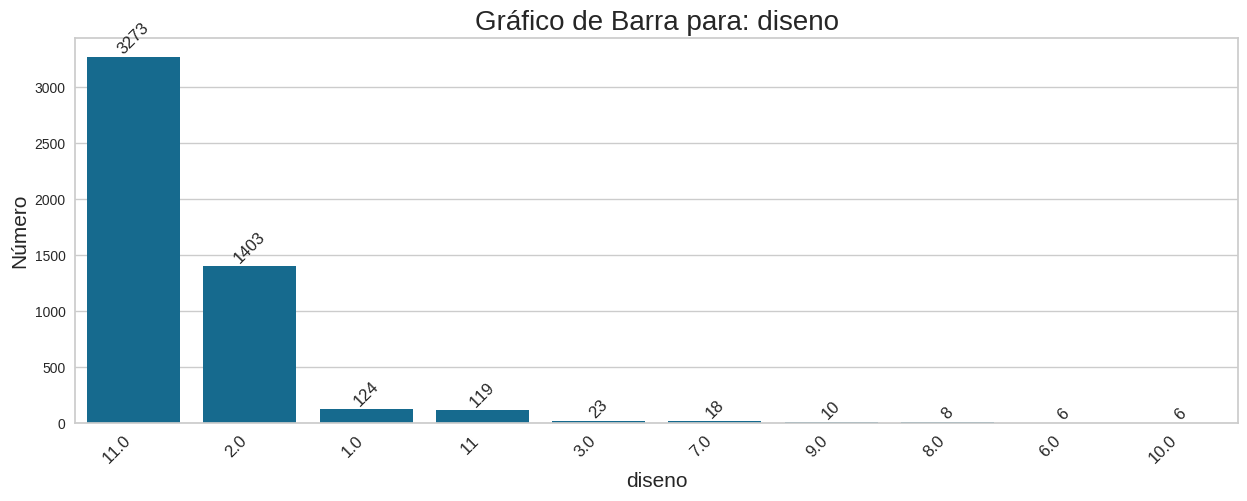

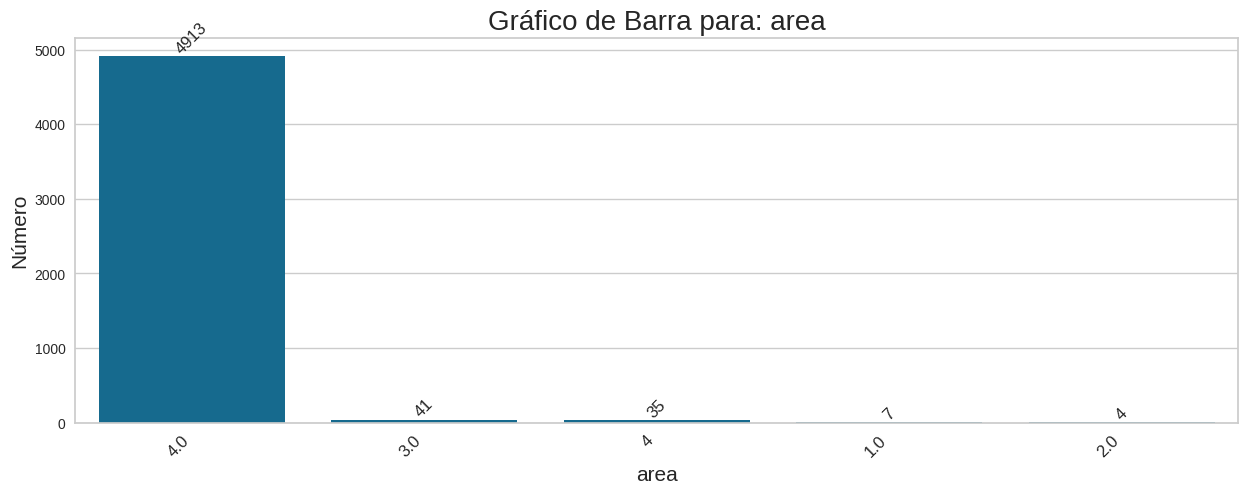

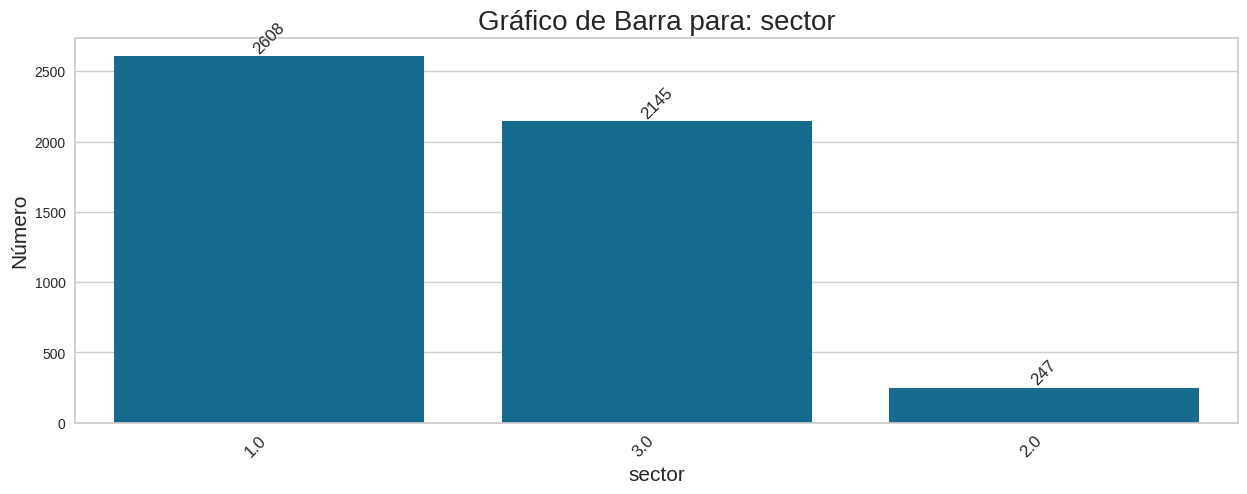

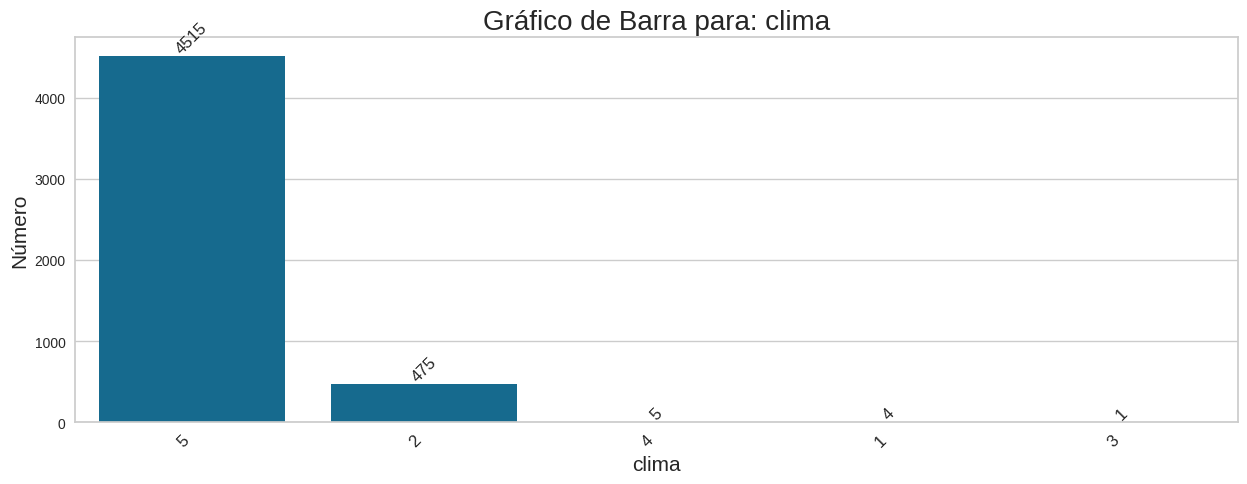

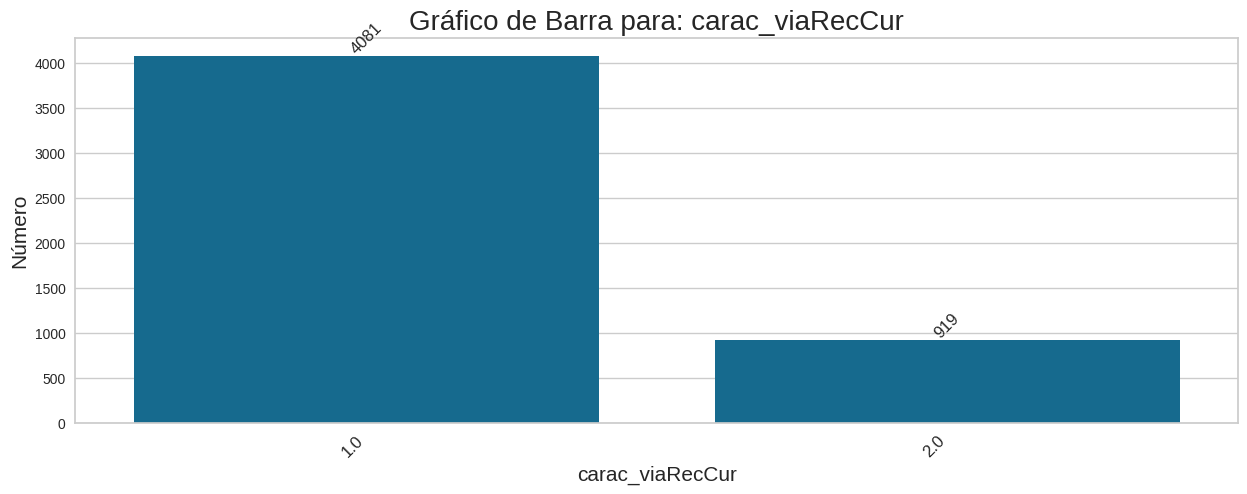

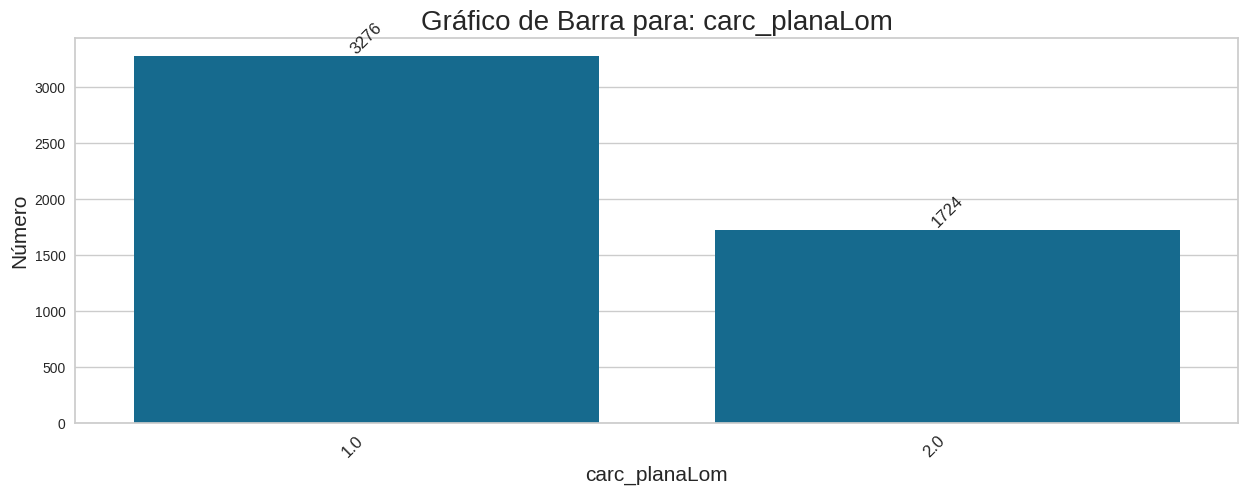

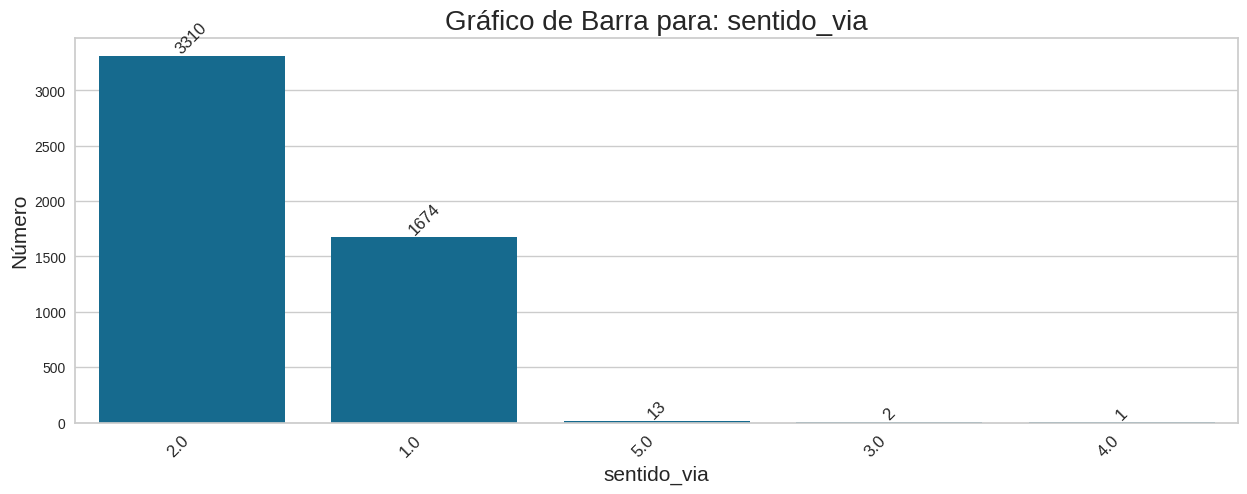

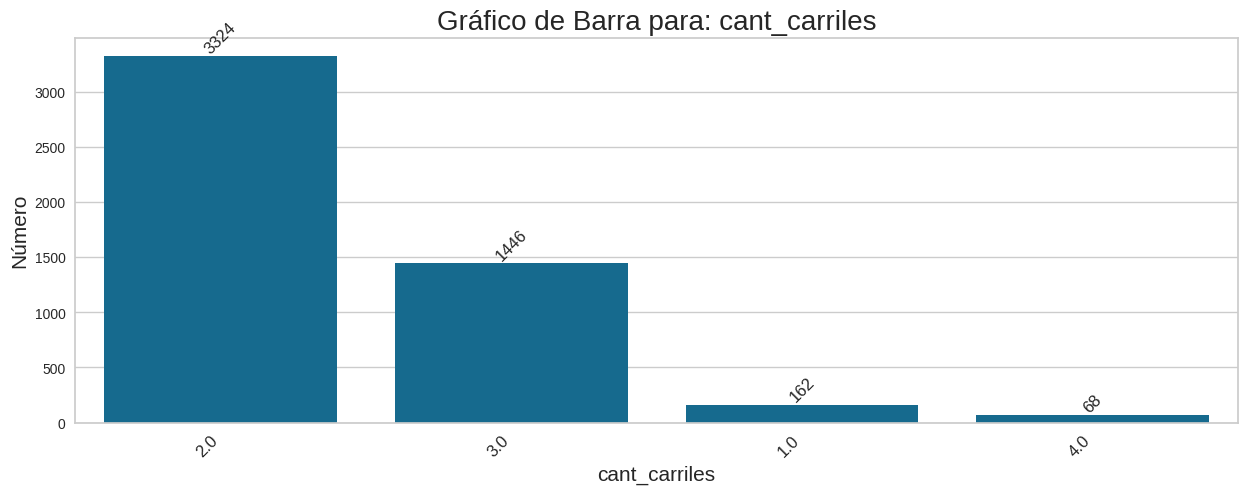

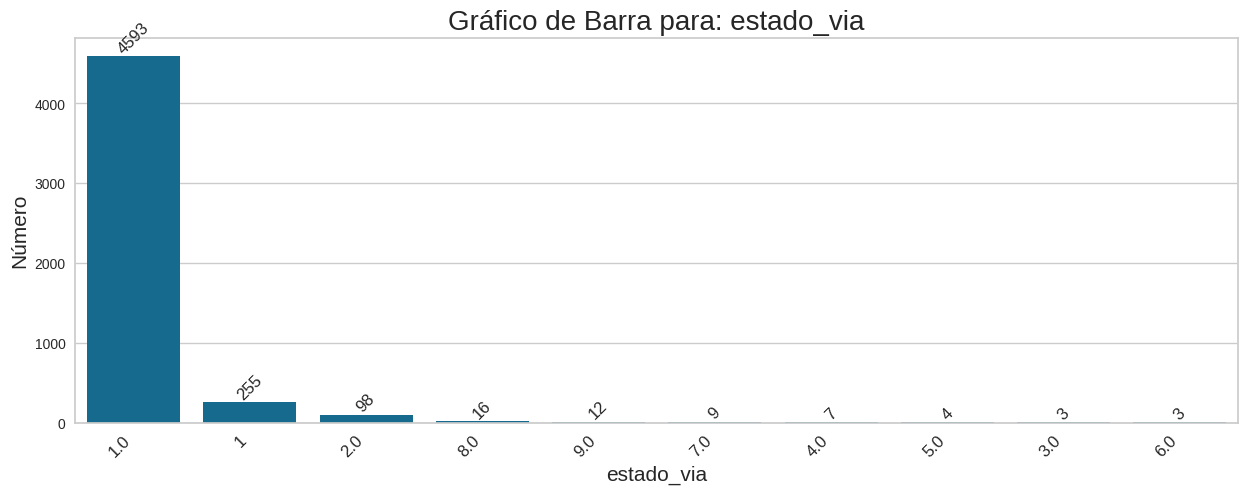

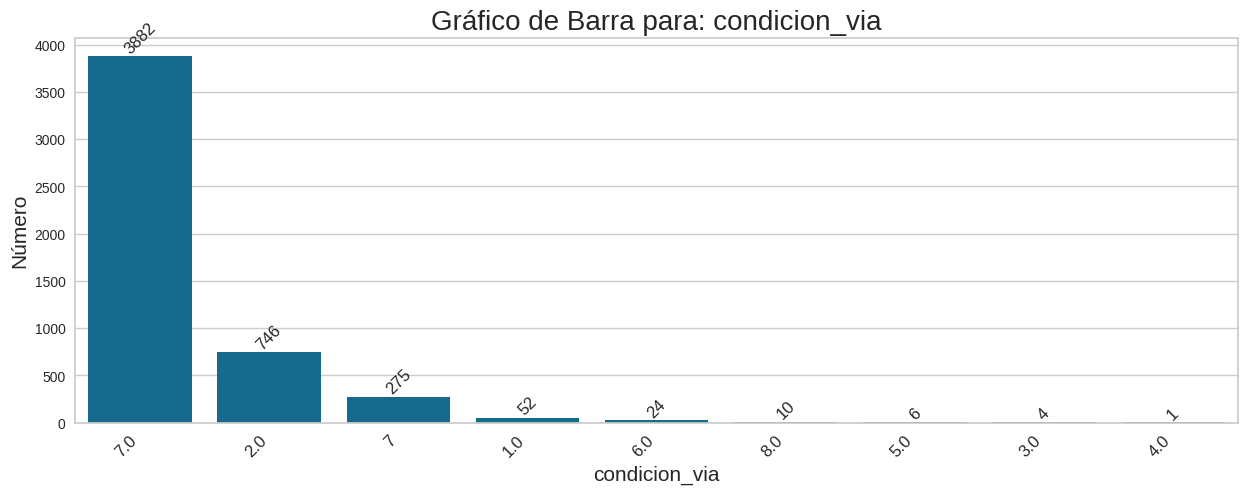

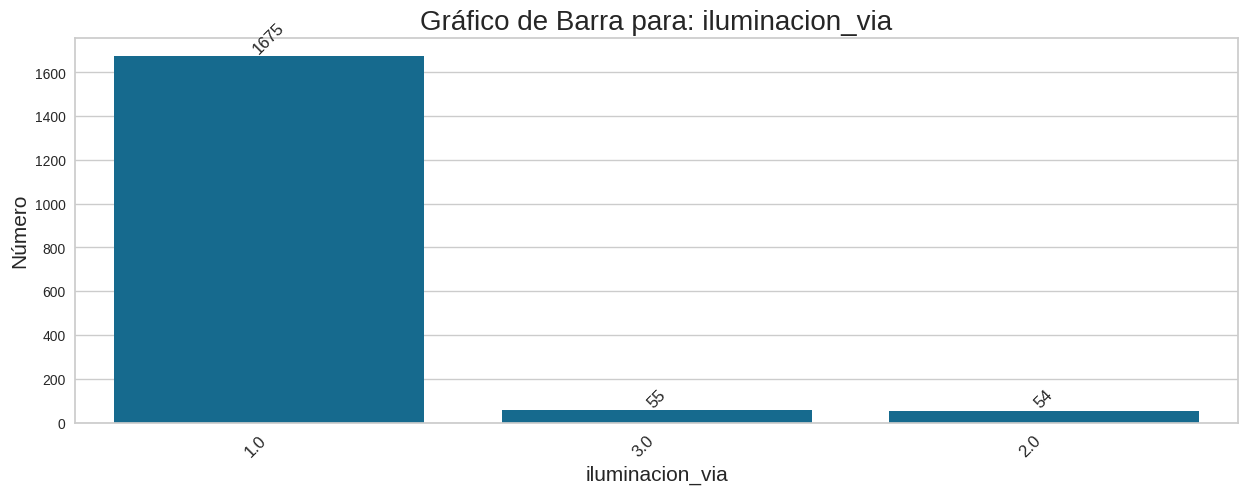

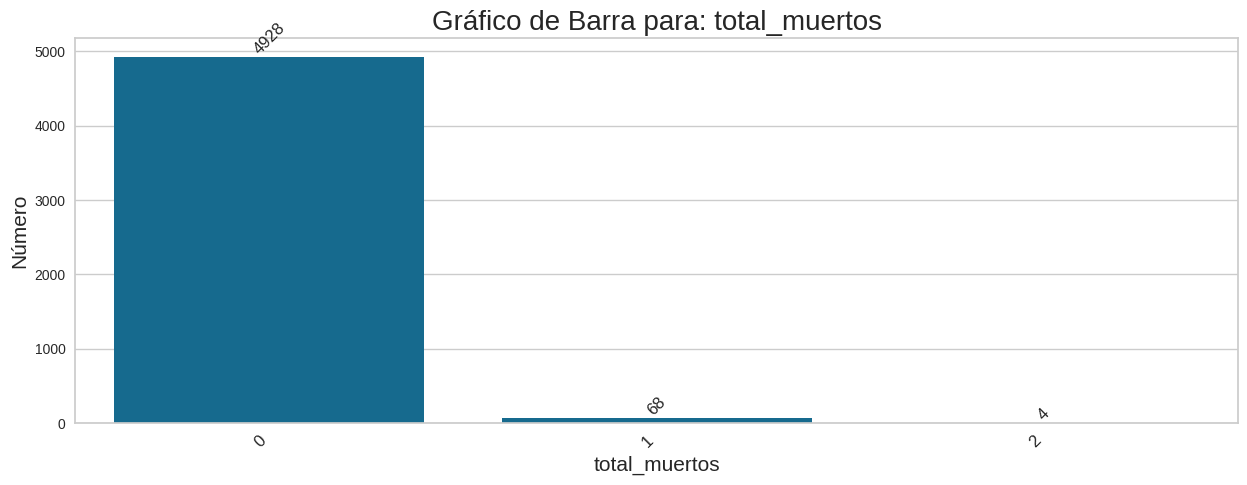

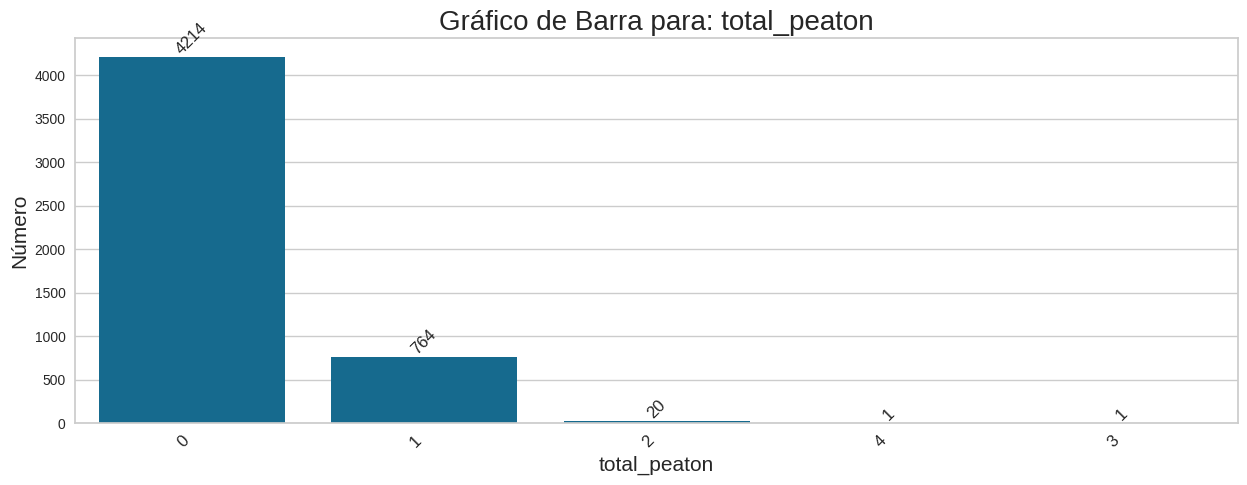

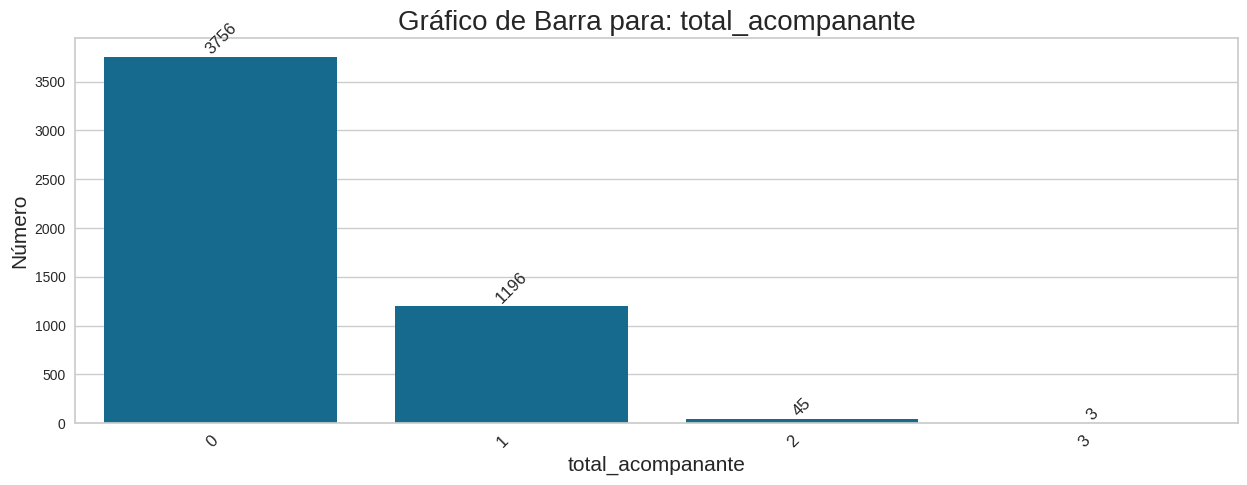

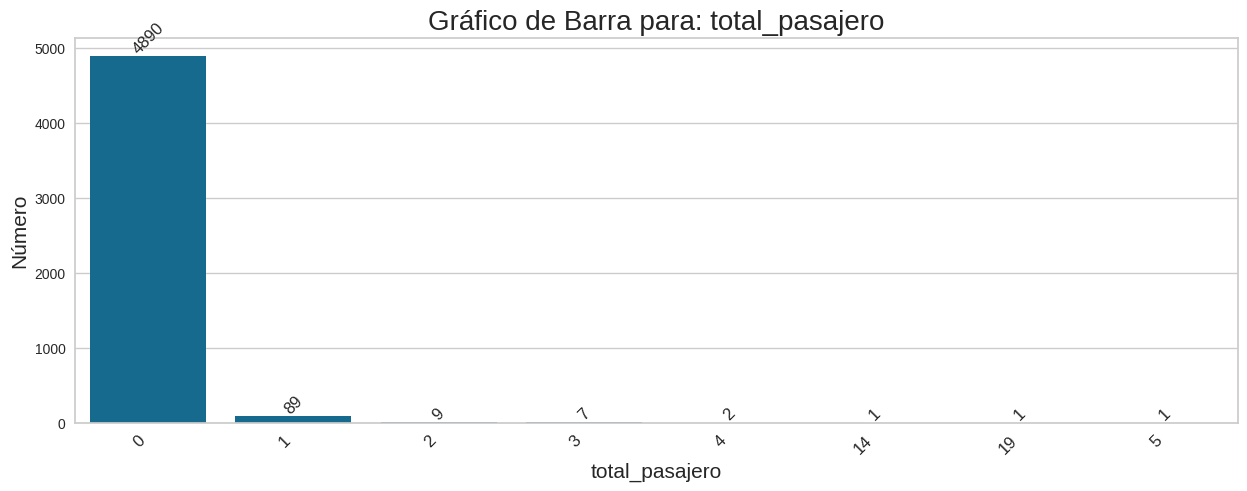

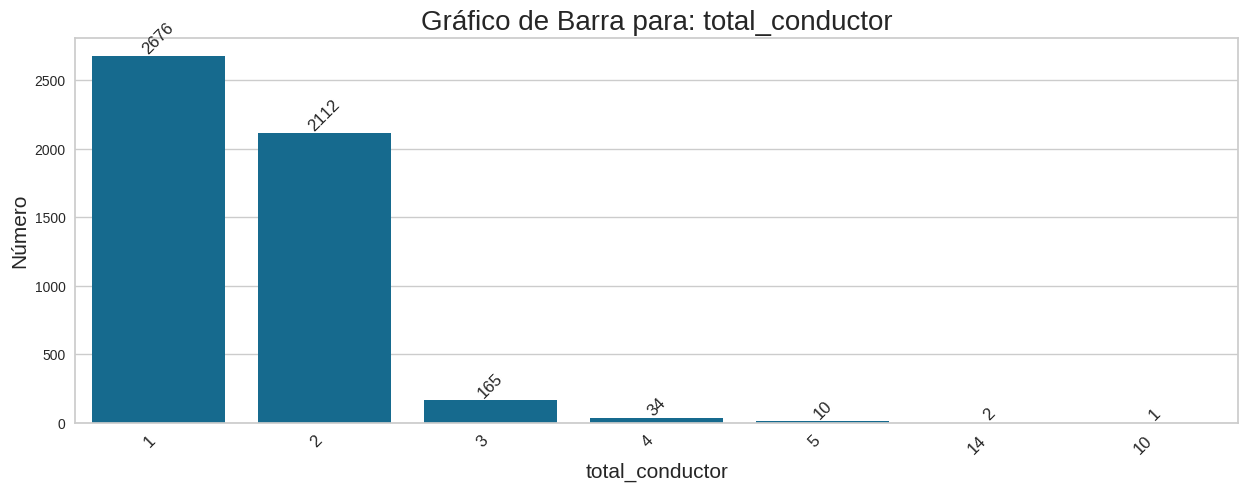

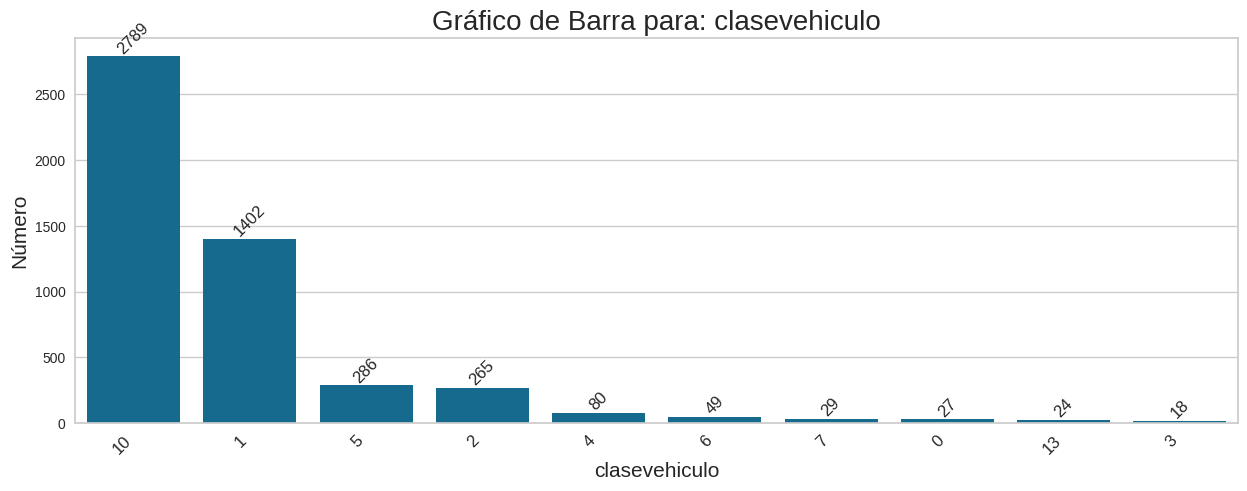

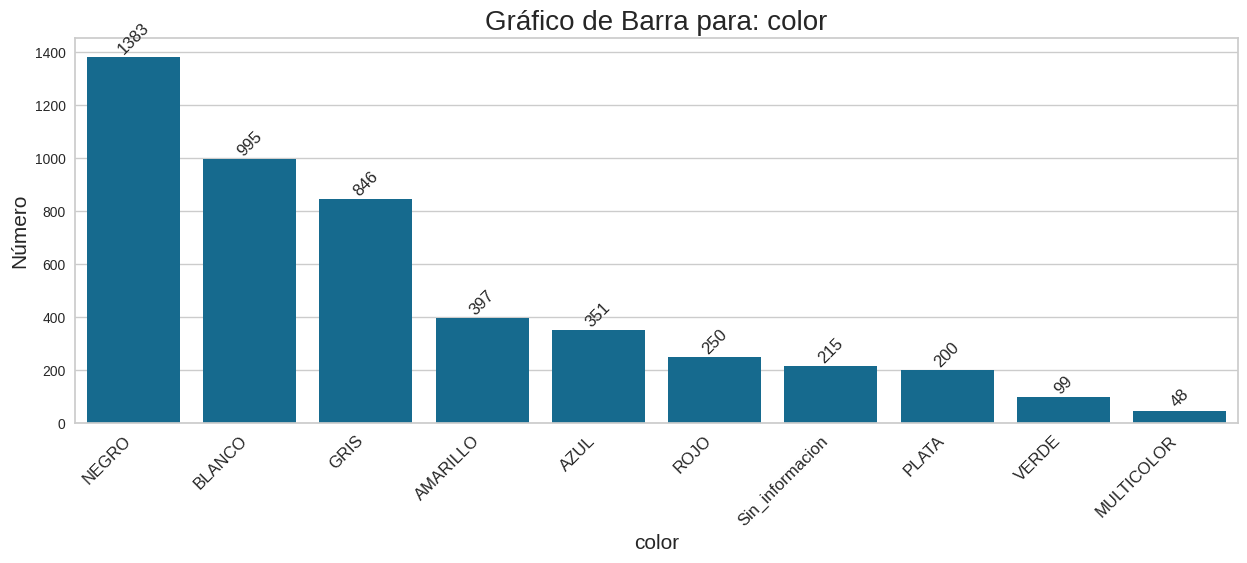

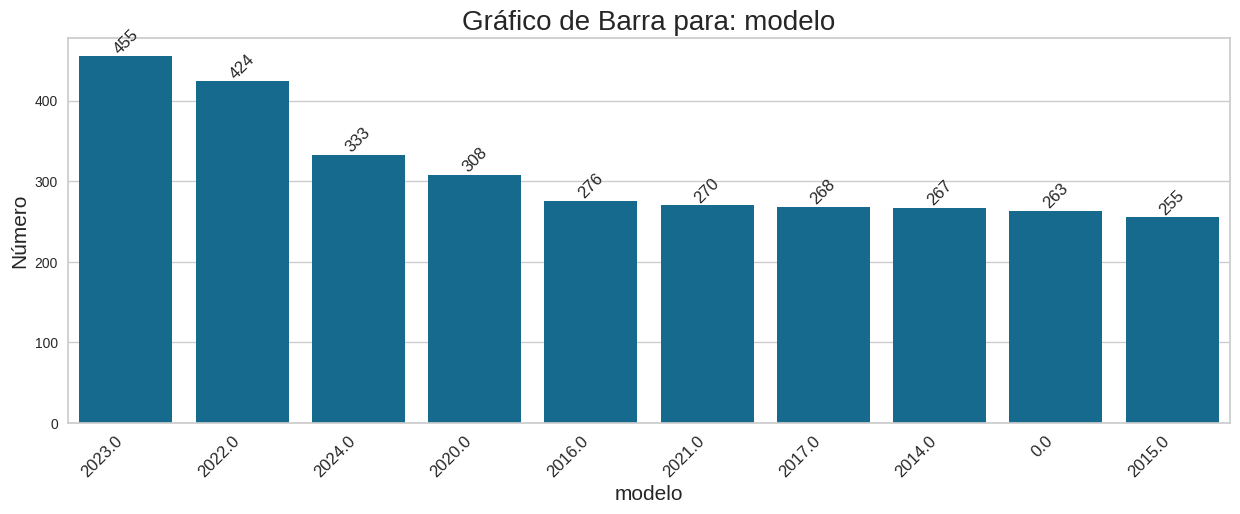

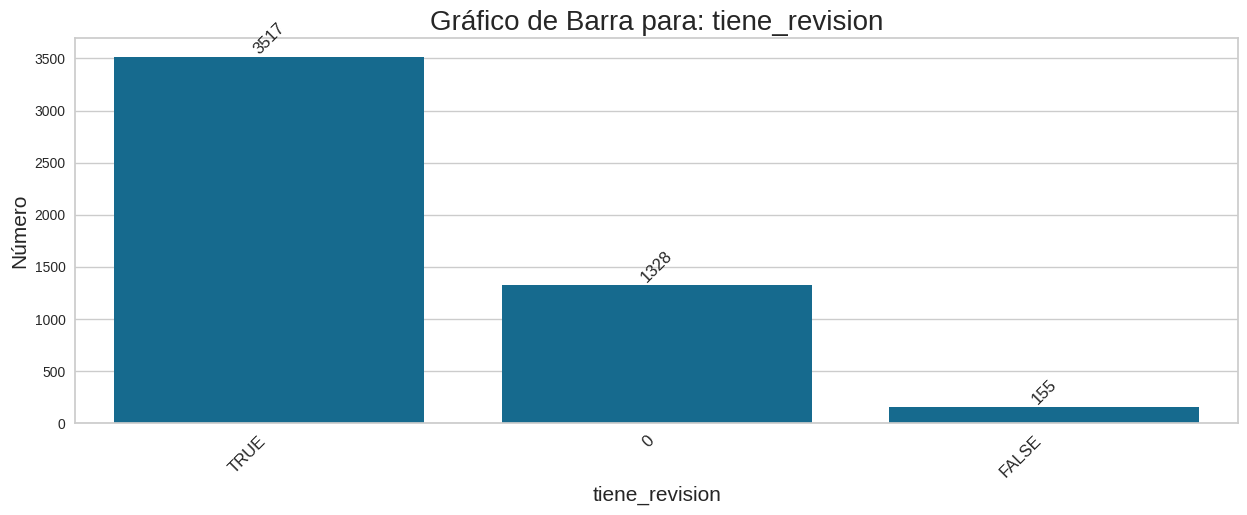

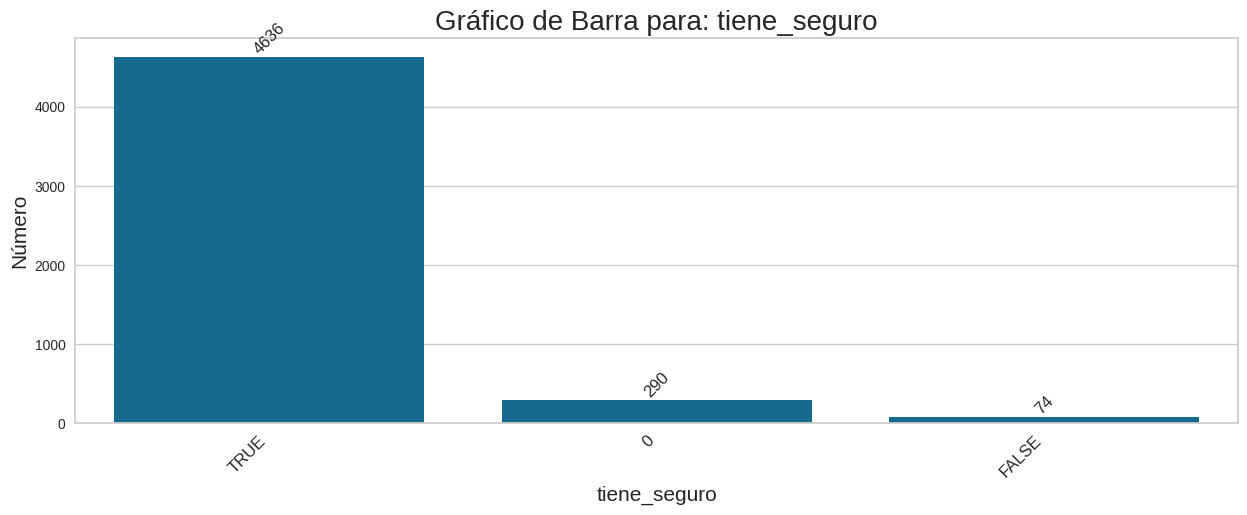

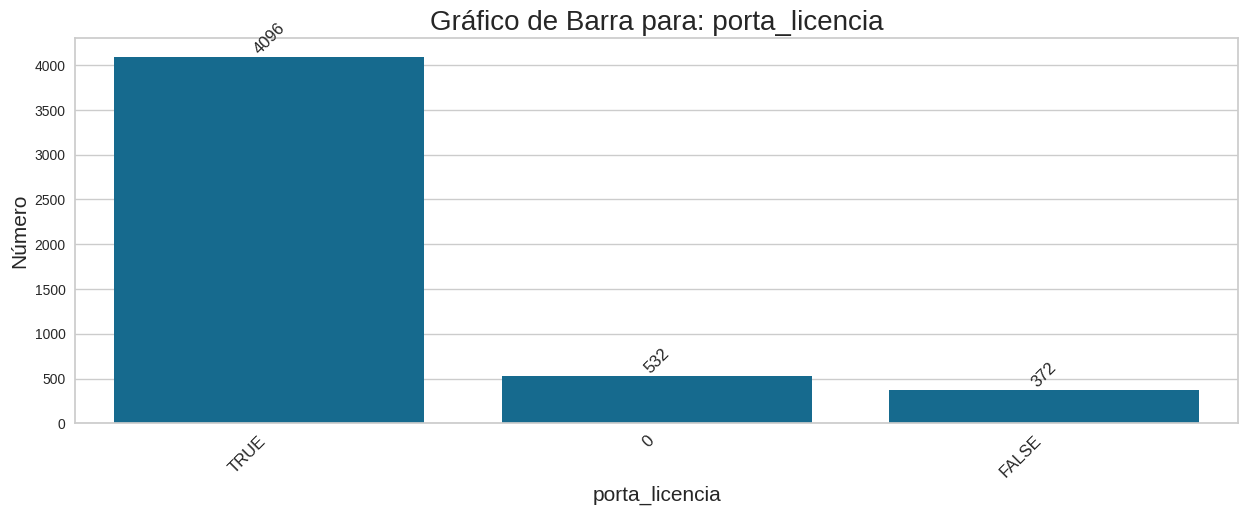

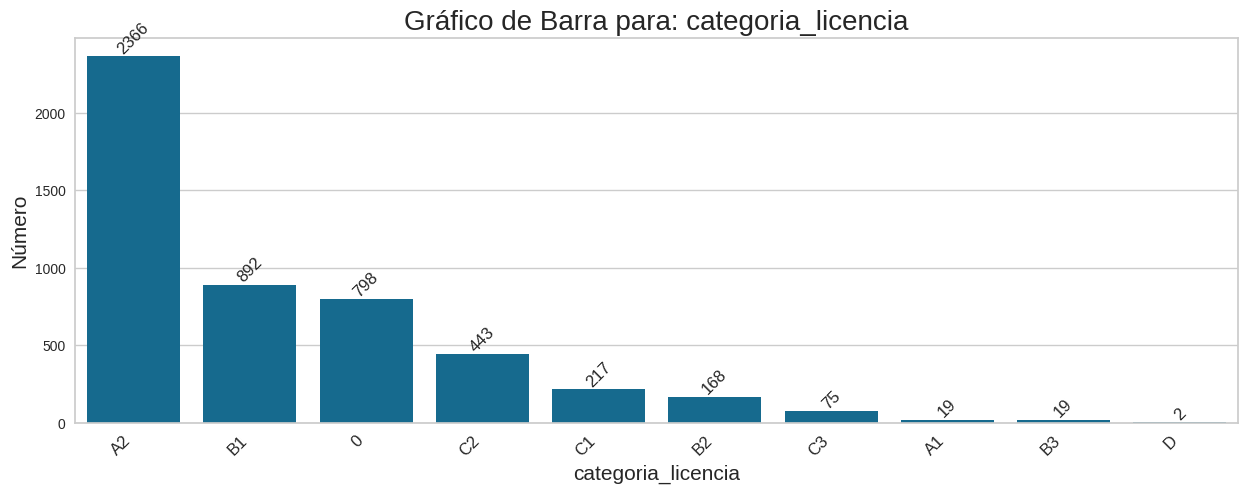

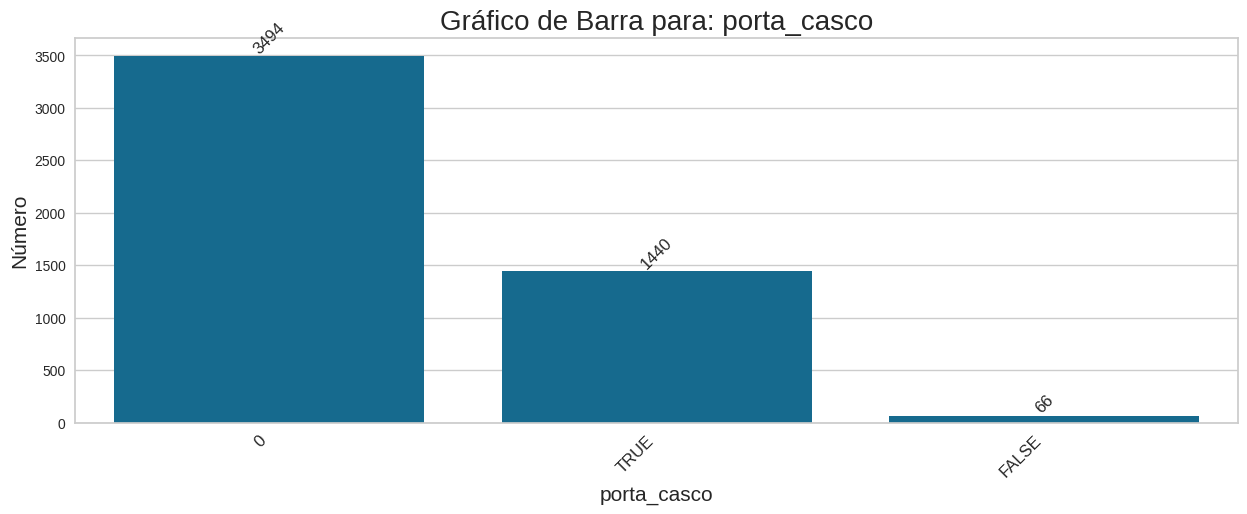

In [ ]:
# Observemos a continuacion como estan distribuidas las columnas categoricas haciendo uso de graficos de barra
import plotly.graph_objects as go
import plotly.express as px

def plot_bar_graphs(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        top_5 = df[column].value_counts().head(10).index
        ax = sns.countplot(x=column, data=df[df[column].isin(top_5)], order=top_5)
        ax.bar_label(ax.containers[0],rotation=45)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('Número', fontsize=15)
        plt.title(f'Gráfico de Barra para: {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

cat_features = ["diseno","area","sector","clima","carac_viaRecCur","carc_planaLom","sentido_via","cant_carriles","estado_via","condicion_via","iluminacion_via","total_muertos","total_peaton","total_acompanante","total_pasajero","total_conductor","clasevehiculo","color","modelo","tiene_revision","tiene_seguro","porta_licencia","categoria_licencia","porta_casco" ]
#cat_features = ["barrio"]

plot_bar_graphs(df, cat_features)

# Análicemos nuestra variable objetivo frente a las demás caracteristicas

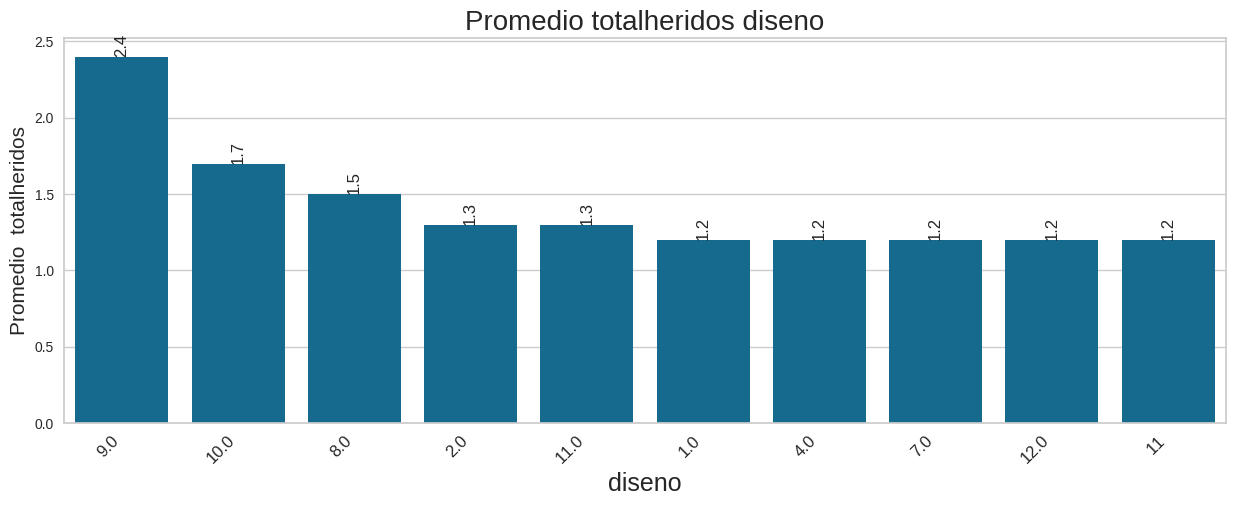

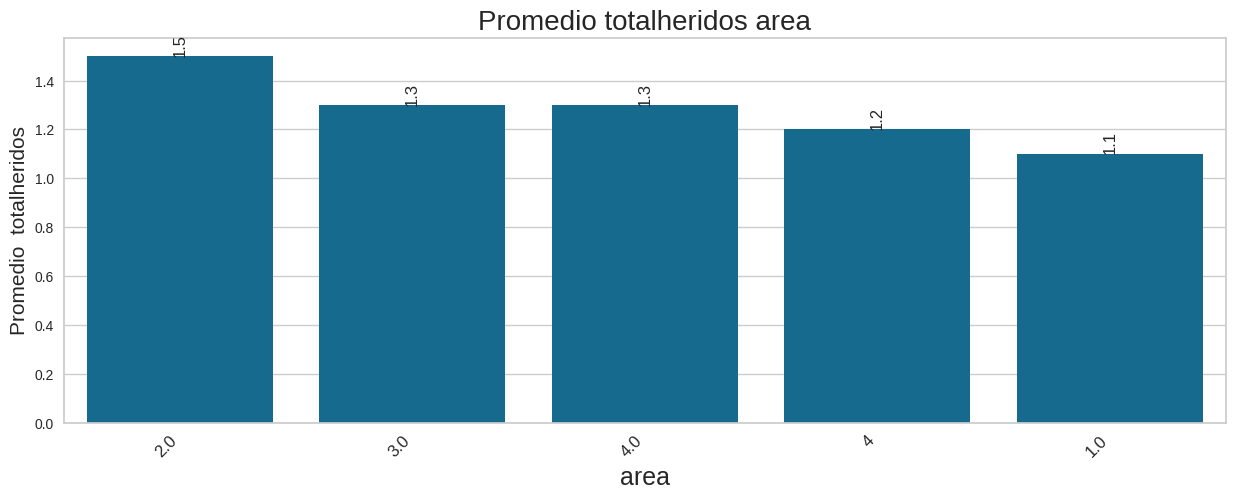

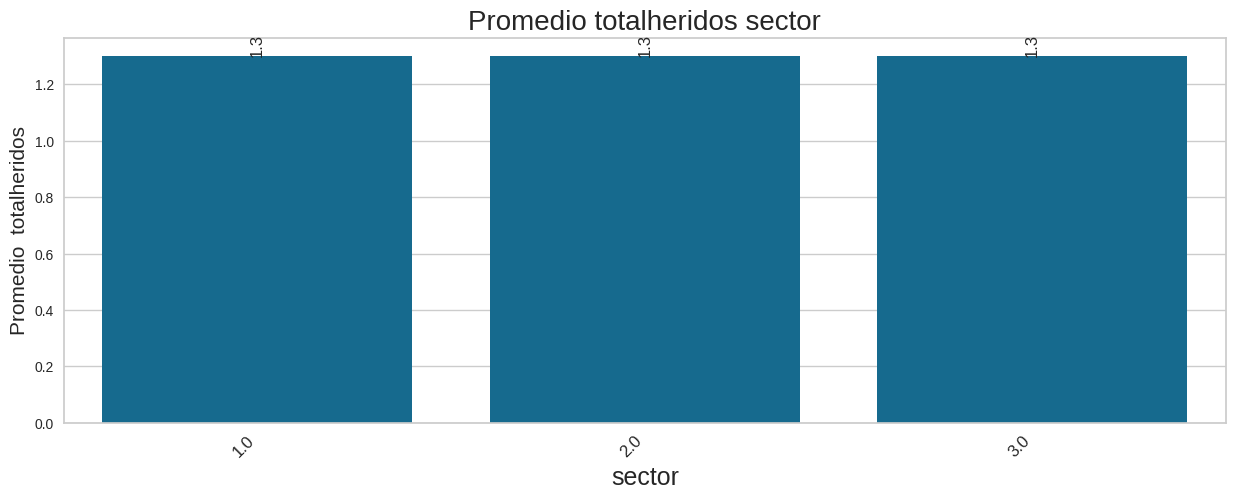

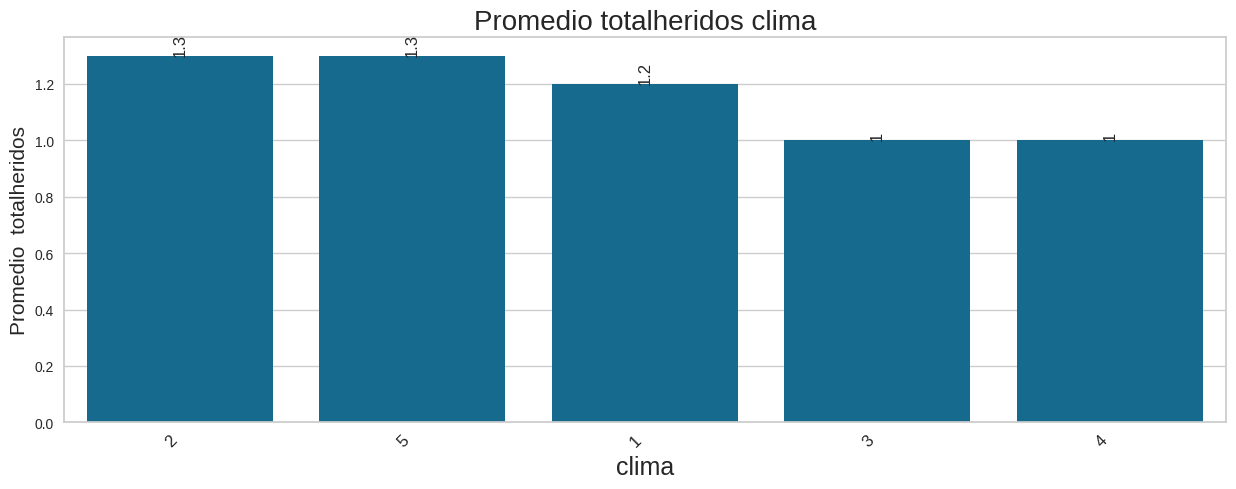

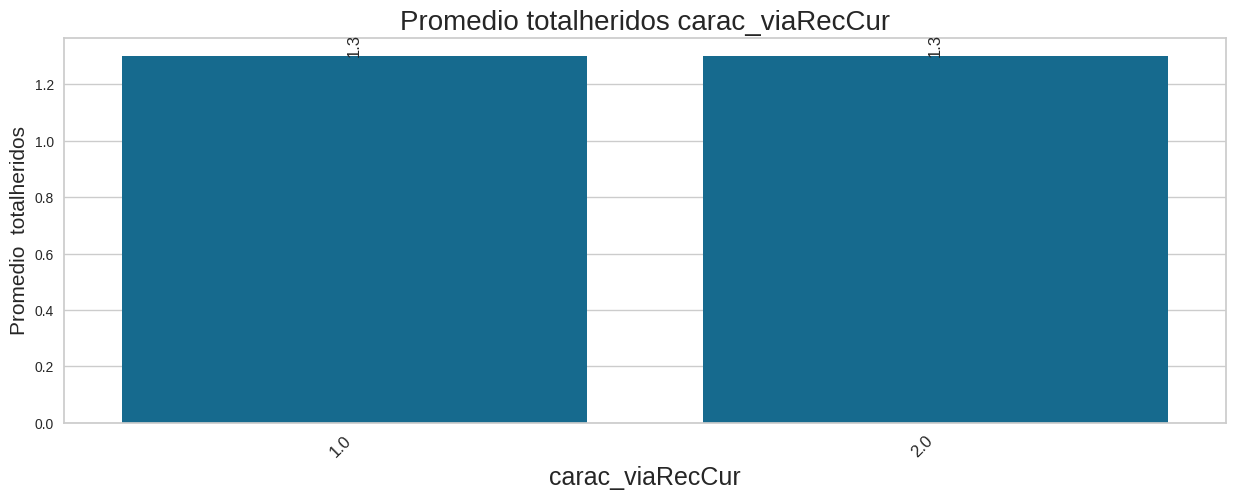

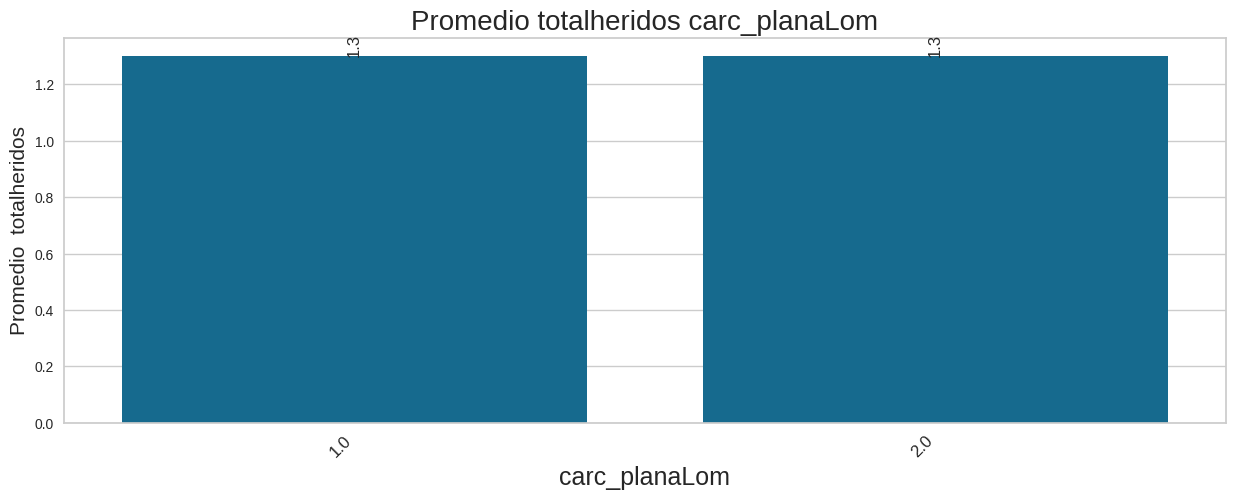

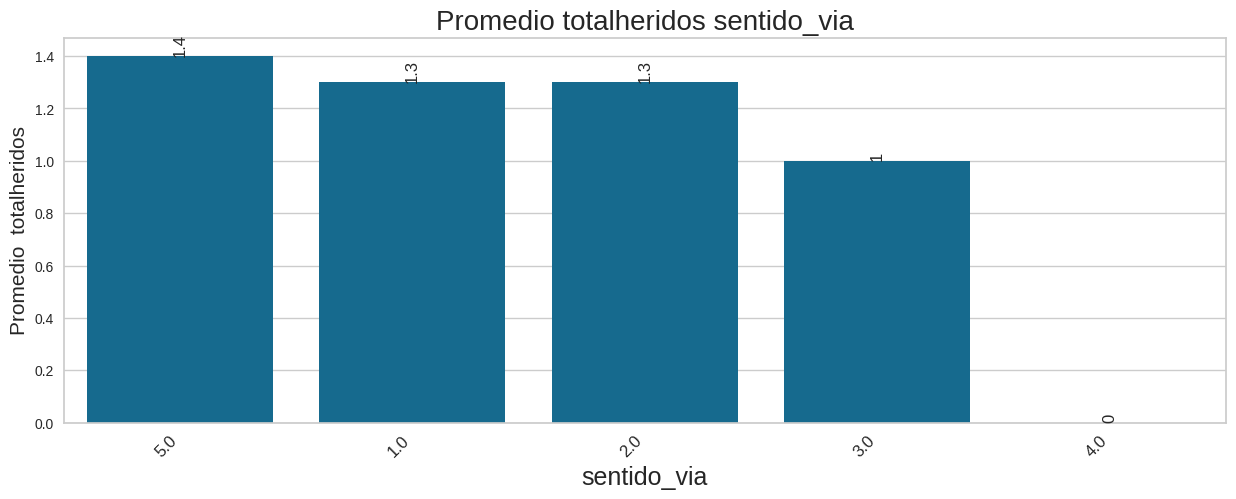

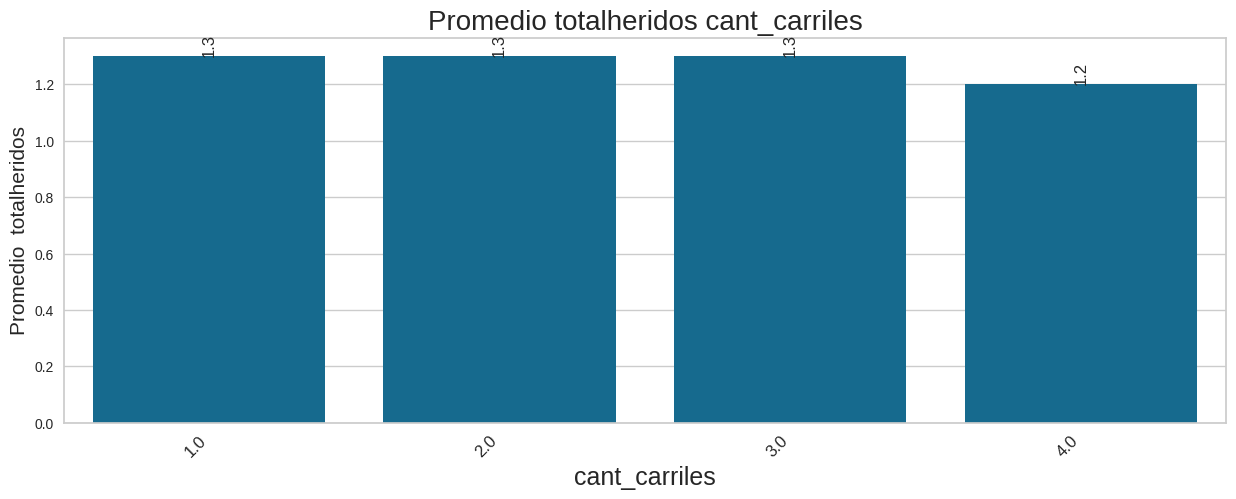

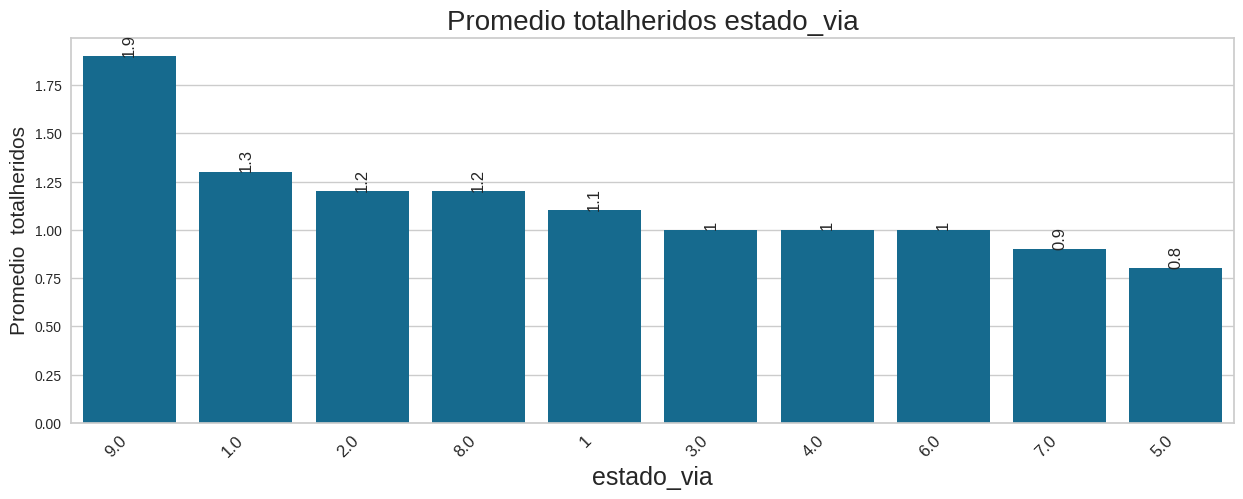

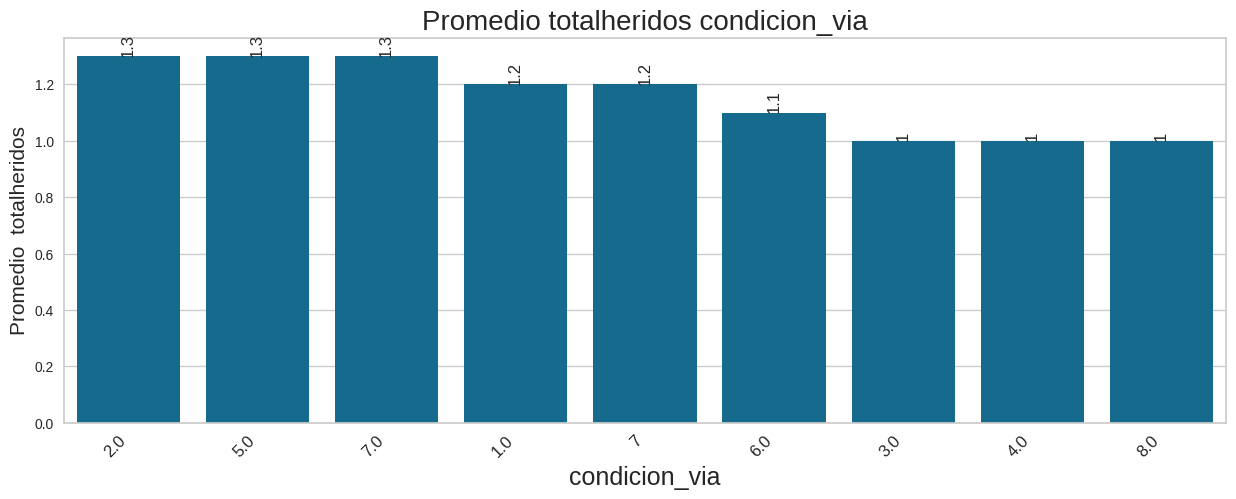

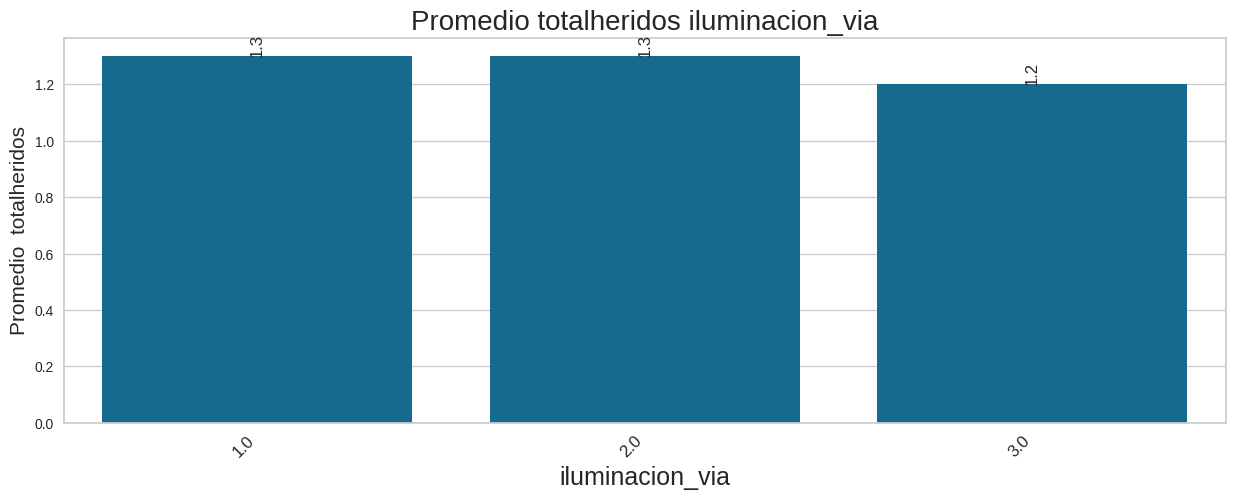

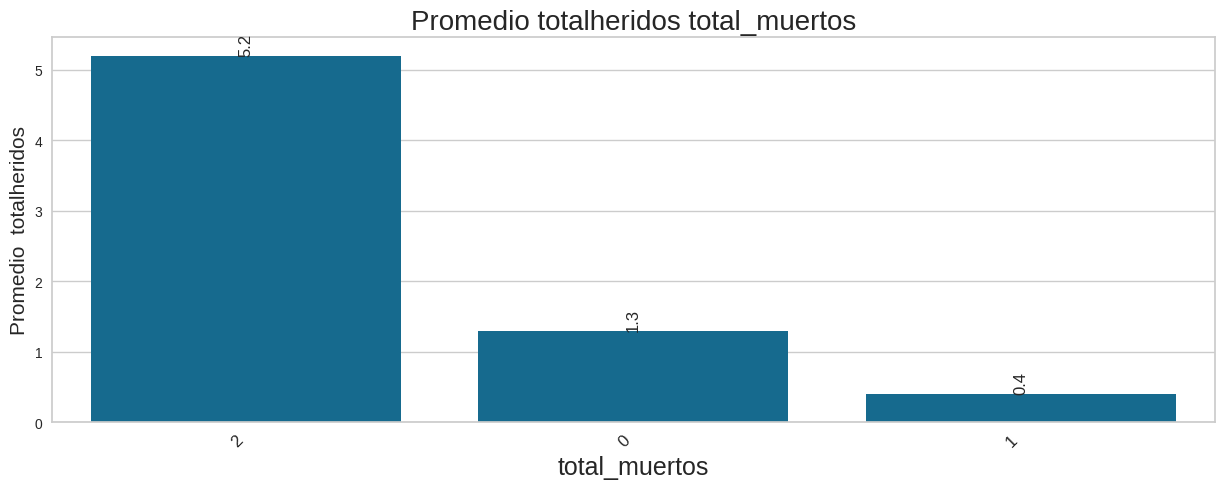

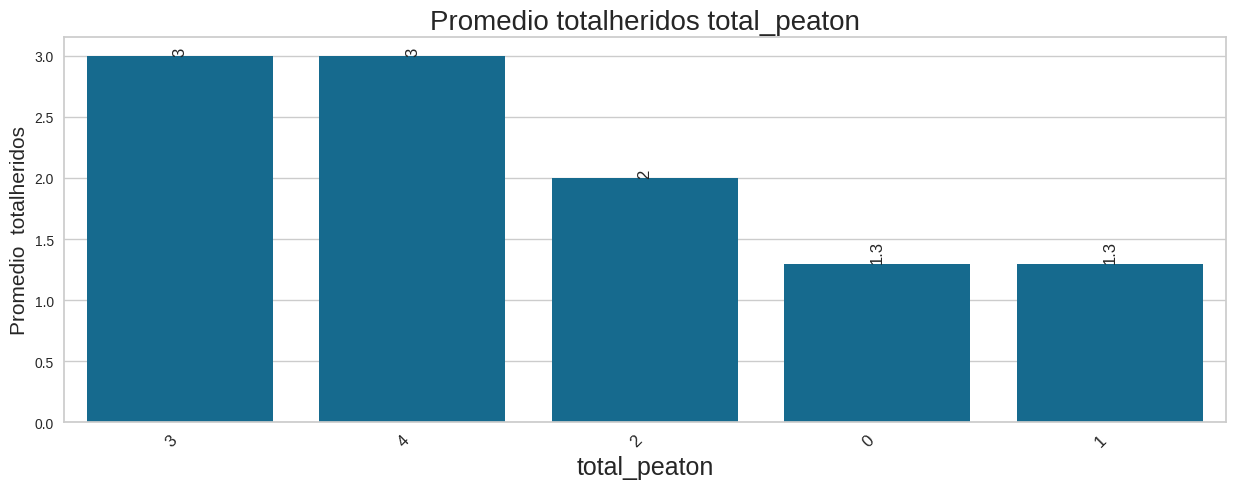

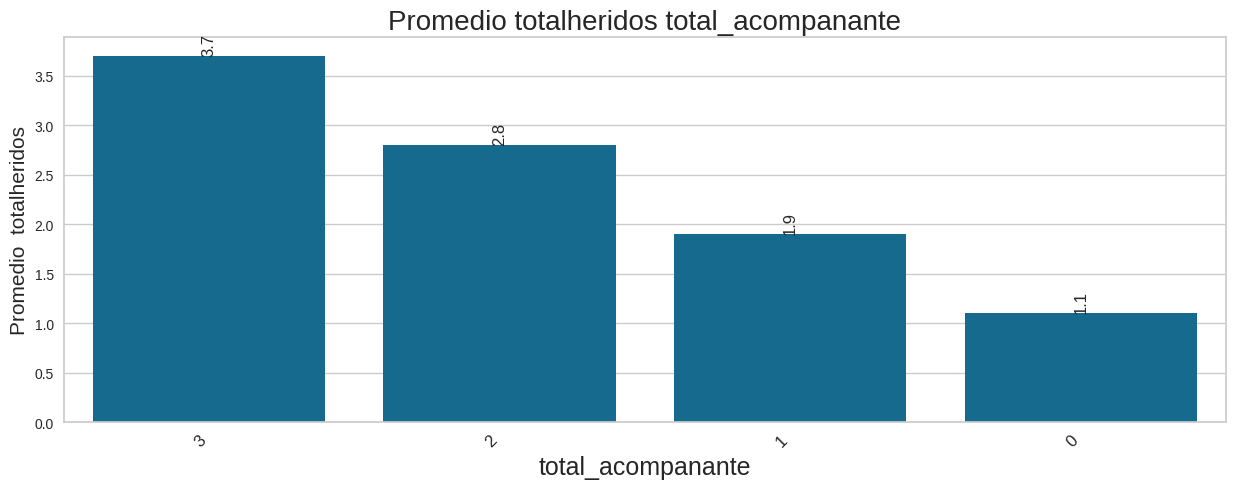

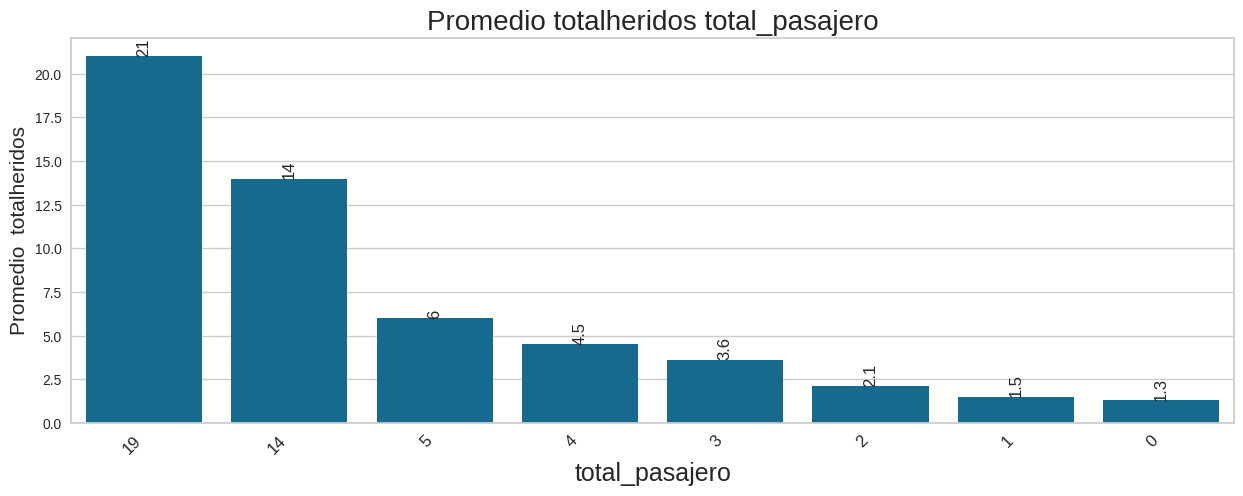

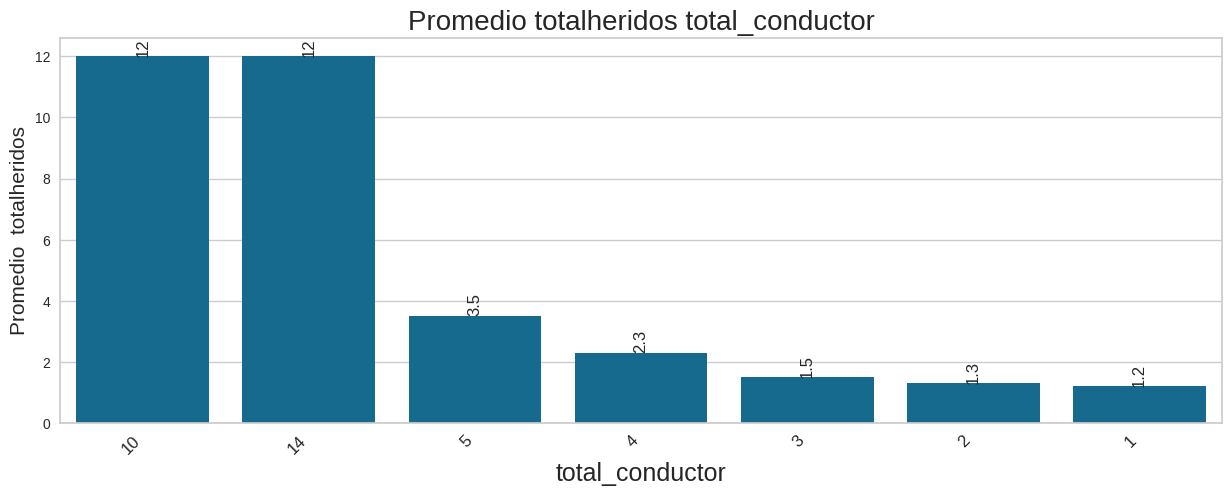

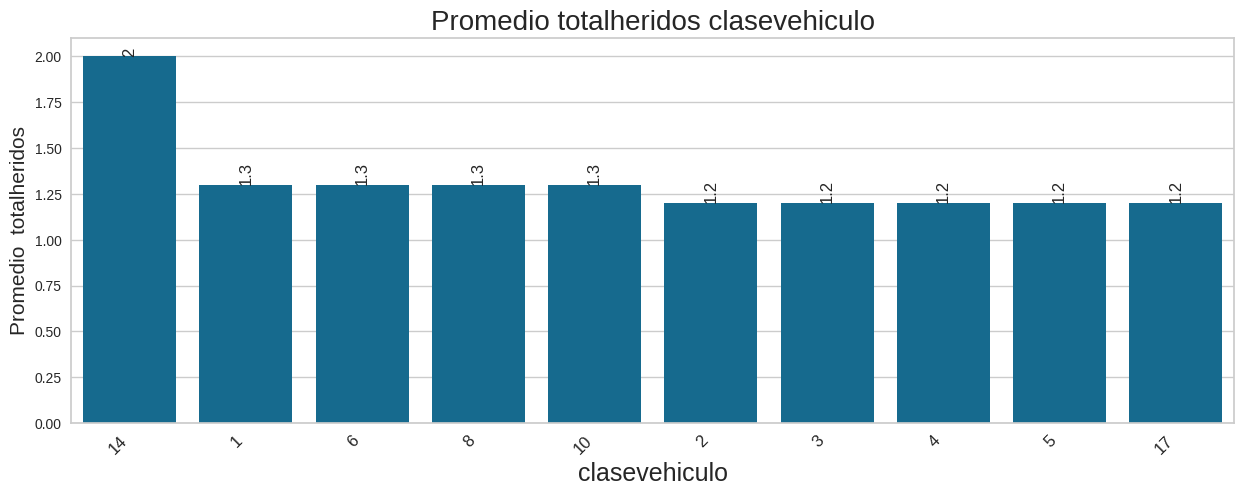

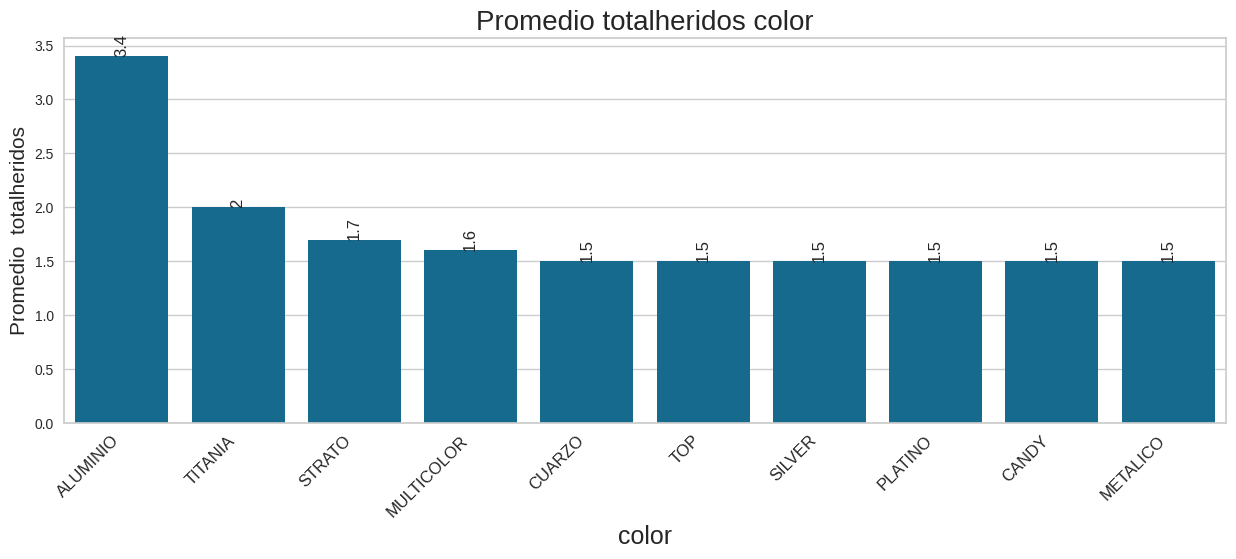

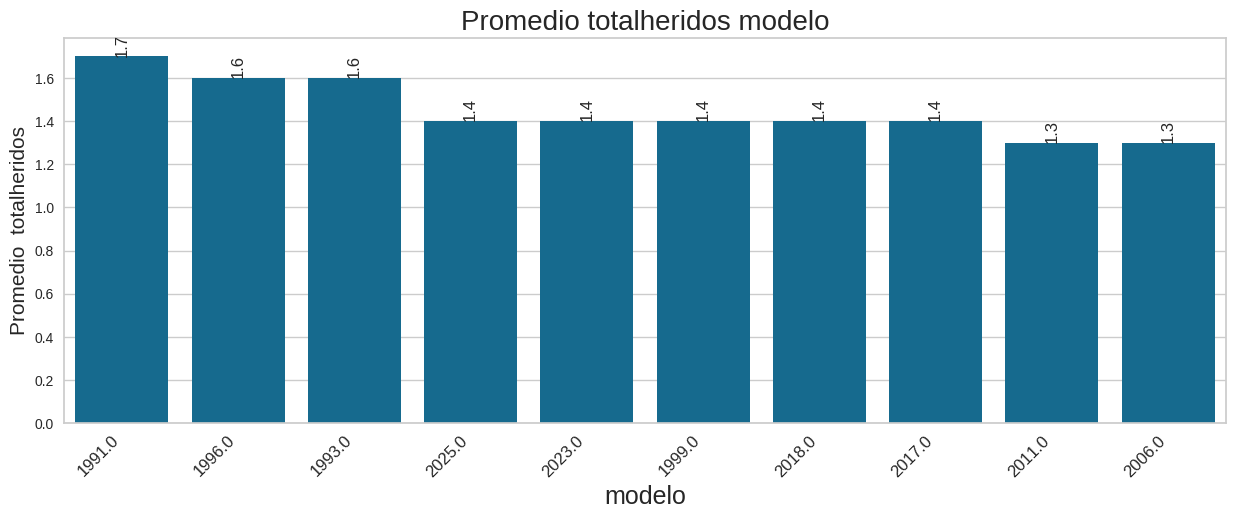

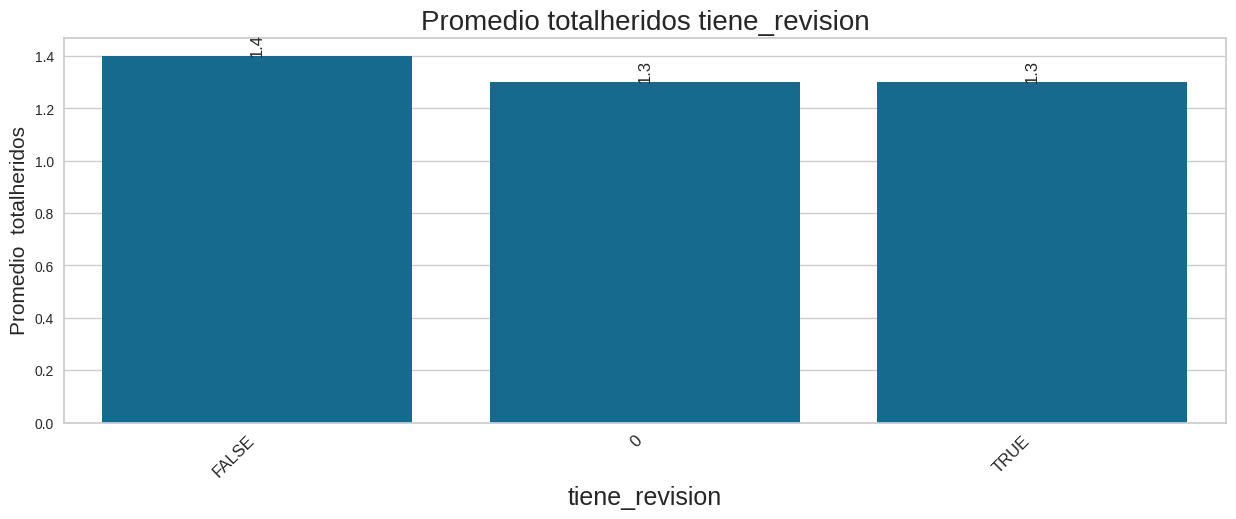

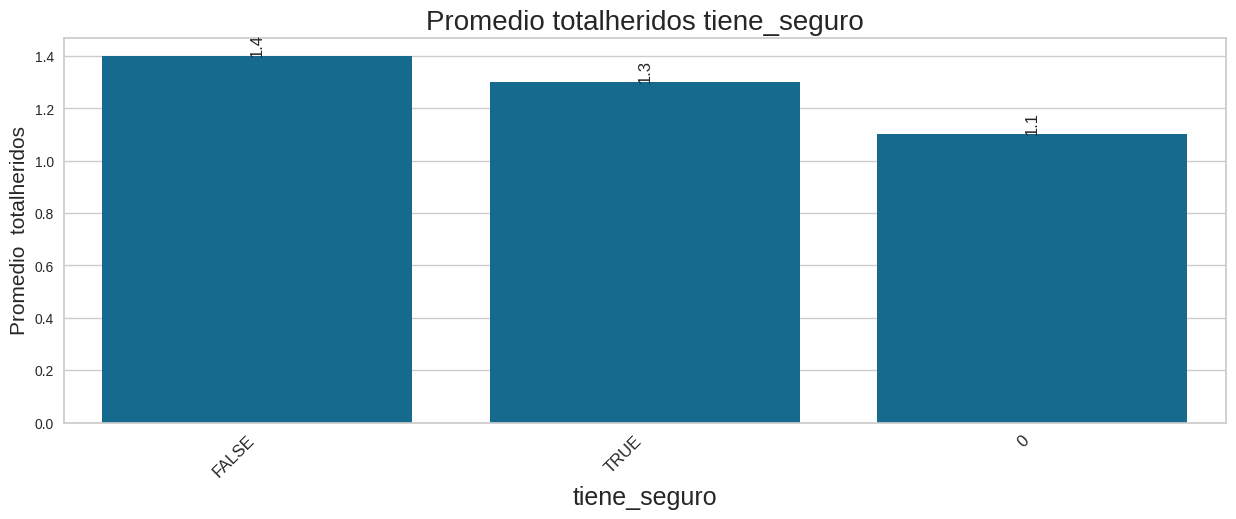

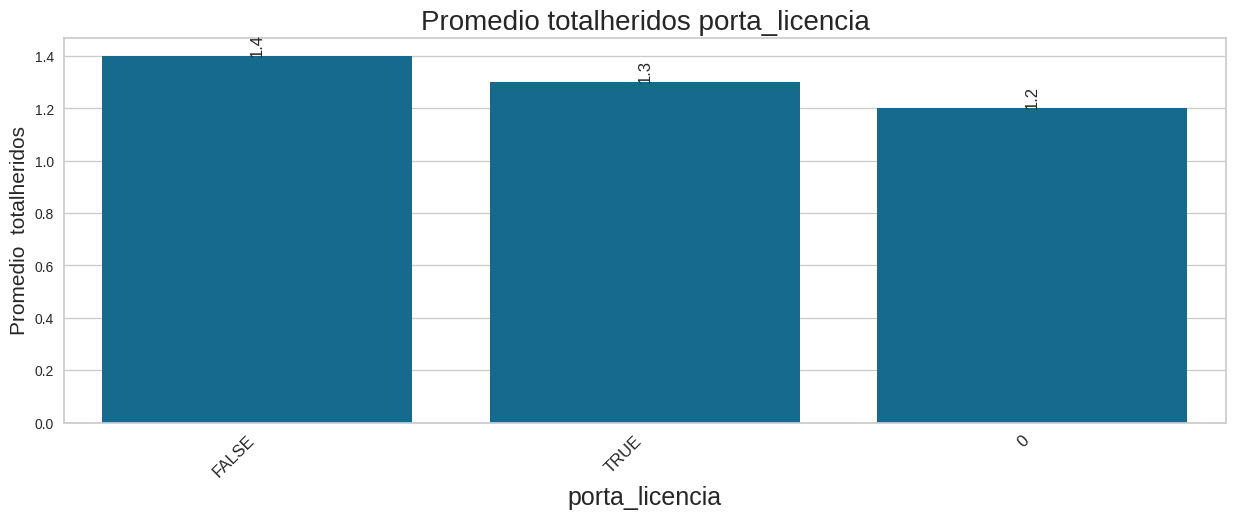

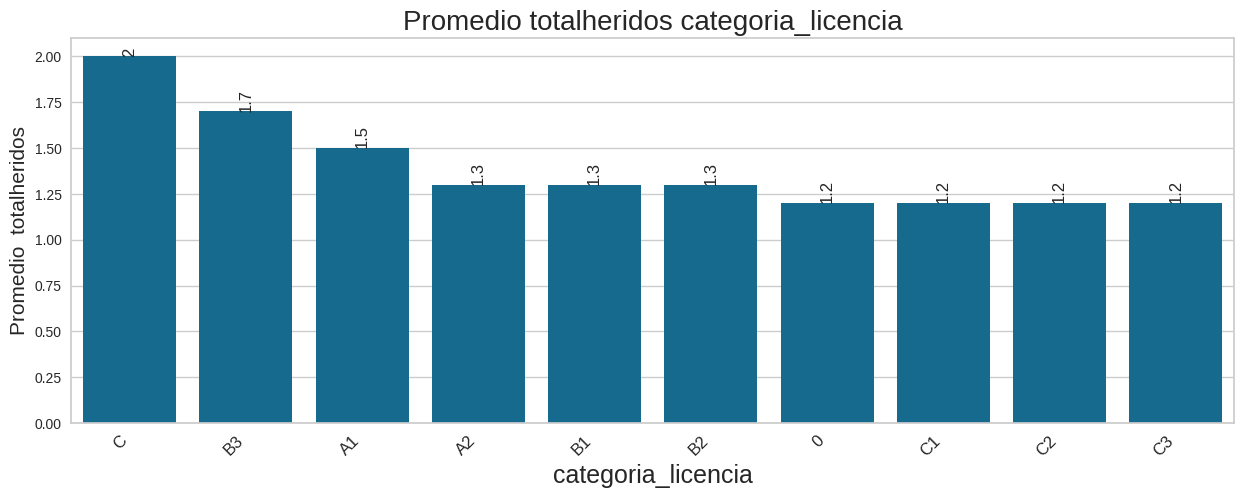

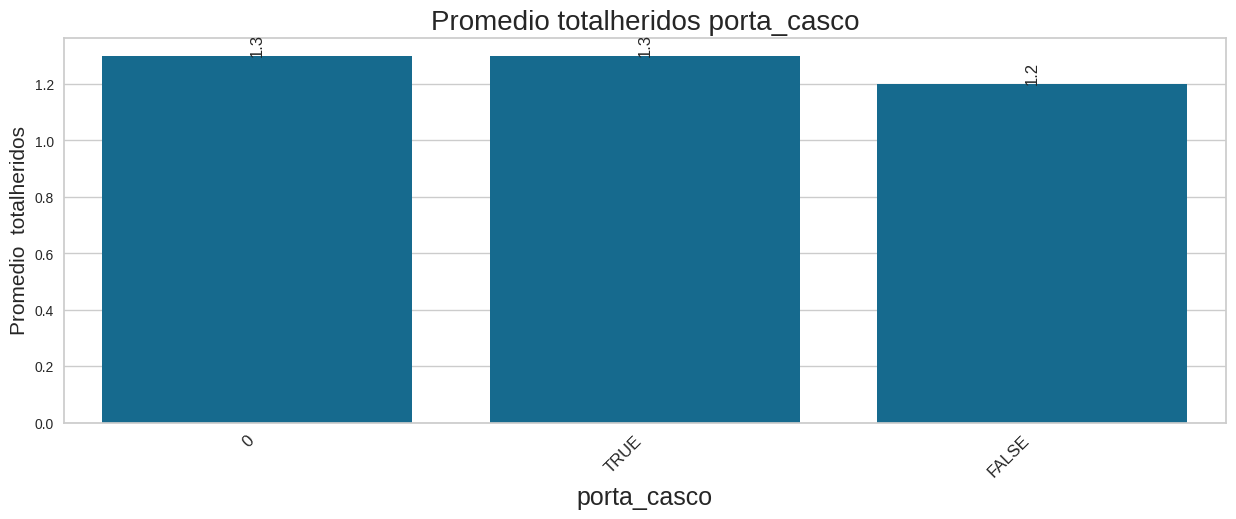

In [ ]:
def plot_bar_with_co2(df, columns):
    for column in columns:
        plt.figure(figsize=(15, 5))
        grouped_data = df.groupby(column)['total_heridos'].mean().round(1).reset_index()
        grouped_data_sorted = grouped_data.sort_values(by='total_heridos', ascending=False).head(10)
        ax = sns.barplot(x=column, y='total_heridos', data=grouped_data_sorted, order=grouped_data_sorted[column])
        ax.bar_label(ax.containers[0],rotation=90)
        plt.xlabel(column, fontsize=18)
        plt.ylabel('Promedio  totalheridos', fontsize=15)
        plt.title(f'Promedio totalheridos {column}', fontsize=20)
        plt.xticks(rotation=45, ha='right', fontsize=12)
        plt.show()

plot_bar_with_co2(df, cat_features)

# Conclusiones de los gráficos observados anteriormente:

Como se puede ver en los gráficos anteriores:





1.   la mayorias de los vehiculos no portan seguro
2.   los vehiculos de modelo viejos son los que mas heridos genera
3.   El color negro es el vehiculo que mas se accidenta , pero el color aluminio es el que genera mas heridos
4.   Entre mas pasajeros mas heridos se producen
5. la mayoria de los accidentes se generan en tramo de via.









# Imputacion de datos faltantes

In [ ]:
# Mostrar las nuevas columnas renombradas
df.columns

Index(['codigo', 'fecha_registro', 'diseno', 'area', 'sector', 'zona', 'clima',
       'carac_viaRecCur', 'carc_planaLom', 'sentido_via', 'cant_carriles',
       'estado_via', 'condicion_via', 'iluminacion_via', 'barrio',
       'total_heridos', 'total_muertos', 'total_peaton', 'total_acompanante',
       'total_pasajero', 'total_conductor', 'clasevehiculo',
       'capacidad_pasajeros', 'cant_acompanantes', 'color', 'modelo',
       'tiene_revision', 'tiene_seguro', 'lugar_impacto', 'impacto_ppal',
       'sexo', 'gravedad', 'porta_licencia', 'categoria_licencia',
       'porta_casco'],
      dtype='object')

In [ ]:
# prompt: se imprime el registro null para validar la imputacion
print(df.loc[df['codigo'] == 1754])

     codigo  fecha_registro diseno area  sector  zona  clima  carac_viaRecCur  \
194    1754           45271     11  4.0     1.0   NaN      5              1.0   

     carc_planaLom  sentido_via  ...  modelo tiene_revision tiene_seguro  \
194            1.0          2.0  ...  2024.0              0         TRUE   

     lugar_impacto impacto_ppal  sexo  gravedad  porta_licencia  \
194              0            0     2         2            TRUE   

     categoria_licencia  porta_casco  
194                  A1            0  

[1 rows x 35 columns]


In [ ]:
#df_labeled = df.copy()
df['diseno'] = df['diseno'].fillna('11')  # basados en el conocimiento de los datos se les asigna el valor
df['area'] = df['area'].fillna('4')  # basados en el conocimiento de los datos se les asigna el valor
df['sector'] = df['sector'].fillna(df['sector'].median())  # Mediana

df['carac_viaRecCur'] = df['carac_viaRecCur'].fillna(df['carac_viaRecCur'].median())  # Mediana
df['carc_planaLom'] = df['carc_planaLom'].fillna(df['carc_planaLom'].median())  # Mediana
df['sentido_via'] = df['sentido_via'].fillna(df['sentido_via'].median())  # Mediana
df['cant_carriles'] = df['cant_carriles'].fillna(df['cant_carriles'].median())  # Mediana
df['estado_via'] = df['estado_via'].fillna('1')  # basados en el conocimiento de los datos se les asigna el valor
df['condicion_via'] = df['condicion_via'].fillna('7')   #basados en el conocimiento de los datos se les asigna el valor

df['cant_acompanantes'] = df['cant_acompanantes'].fillna(df['cant_acompanantes'].median())  # Mediana
df['total_acompanante'] = df['total_acompanante'].fillna(df['total_acompanante'].median())  # Mediana
df['capacidad_pasajeros'] = df['capacidad_pasajeros'].fillna(df['capacidad_pasajeros'].median())  # Mediana
df['color'] = df['color'].fillna('Sin_informacion')
#df_labeled['modelo'] = df_labeled['modelo'].replace(0, median_value)



In [ ]:
# prompt: ver el registro id = 1754 en dataset df_labeled

# Assuming df_labeled is your DataFrame and it's already loaded.
# Replace 'df_labeled' with the actual name of your DataFrame variable if different.

print(df.loc[df['codigo'] == 1754])


     codigo  fecha_registro diseno area  sector  zona  clima  carac_viaRecCur  \
194    1754           45271     11  4.0     1.0   NaN      5              1.0   

     carc_planaLom  sentido_via  ...  modelo tiene_revision tiene_seguro  \
194            1.0          2.0  ...  2024.0              0         TRUE   

     lugar_impacto impacto_ppal  sexo  gravedad  porta_licencia  \
194              0            0     2         2            TRUE   

     categoria_licencia  porta_casco  
194                  A1            0  

[1 rows x 35 columns]


In [ ]:
# Mostrar las nuevas columnas renombradas
df.columns

Index(['codigo', 'fecha_registro', 'diseno', 'area', 'sector', 'zona', 'clima',
       'carac_viaRecCur', 'carc_planaLom', 'sentido_via', 'cant_carriles',
       'estado_via', 'condicion_via', 'iluminacion_via', 'barrio',
       'total_heridos', 'total_muertos', 'total_peaton', 'total_acompanante',
       'total_pasajero', 'total_conductor', 'clasevehiculo',
       'capacidad_pasajeros', 'cant_acompanantes', 'color', 'modelo',
       'tiene_revision', 'tiene_seguro', 'lugar_impacto', 'impacto_ppal',
       'sexo', 'gravedad', 'porta_licencia', 'categoria_licencia',
       'porta_casco'],
      dtype='object')

# Aplicar Encoding a las características categóricas

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Copiar el dataset para evitar modificar el original directamente
df_labeled = df.copy()

# Listar las columnas categóricas
categorical_columns = ["fecha_registro","barrio","color","modelo","tiene_revision","tiene_seguro","porta_licencia","porta_licencia","categoria_licencia","porta_casco"]

# Aplicar Label Encoding para cada columna categórica
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df_labeled[column] = le.fit_transform(df_labeled[column])
    label_encoders[column] = le

# Mostrar las primeras filas del Dataframe codificado(encoded)
#print(df_labeled.head())
df_labeled.head()

codigo  fecha_registro diseno area  sector  zona  clima  carac_viaRecCur  \
0    1380               2    2.0  4.0     1.0   NaN      5              1.0   
1    1357               0    2.0  4.0     1.0   1.0      5              1.0   
2    1370               1    2.0  4.0     3.0   NaN      5              1.0   
3    1435               6   11.0  4.0     1.0   NaN      5              1.0   
4    1424               5   11.0  3.0     3.0   NaN      5              1.0   

   carc_planaLom  sentido_via  ...  modelo tiene_revision tiene_seguro  \
0            2.0          2.0  ...      49              0            2   
1            2.0          1.0  ...      42              2            2   
2            1.0          2.0  ...      46              2            2   
3            2.0          2.0  ...      47              0            2   
4            2.0          2.0  ...      39              2            2   

   lugar_impacto  impacto_ppal  sexo  gravedad  porta_licencia  \
0              0             0     1         2               2   
1              2             1     1         0               2   
2              1             1     1         2               2   
3              3             9     1         0               0   
4              2             7     1         0               2   

   categoria_licencia  porta_casco  
0                   2            0  
1                   3            0  
2                   2            1  
3                   3            0  
4                   8            0  

[5 rows x 35 columns]

# Qué Observamos? Cómo funciona el Label Encoder?

Tu respuesta Aqui Campista...

In [ ]:
# Imprimimos la información del DataSet codificado (encoded)
df_labeled.info()
df_labeled.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   codigo               5000 non-null   int64  
 1   fecha_registro       5000 non-null   int64  
 2   diseno               5000 non-null   object 
 3   area                 5000 non-null   object 
 4   sector               5000 non-null   float64
 5   zona                 1551 non-null   float64
 6   clima                5000 non-null   int64  
 7   carac_viaRecCur      5000 non-null   float64
 8   carc_planaLom        5000 non-null   float64
 9   sentido_via          5000 non-null   float64
 10  cant_carriles        5000 non-null   float64
 11  estado_via           5000 non-null   object 
 12  condicion_via        5000 non-null   object 
 13  iluminacion_via      1784 non-null   float64
 14  barrio               5000 non-null   int64  
 15  total_heridos        5000 non-null   i

Index(['codigo', 'fecha_registro', 'diseno', 'area', 'sector', 'zona', 'clima',
       'carac_viaRecCur', 'carc_planaLom', 'sentido_via', 'cant_carriles',
       'estado_via', 'condicion_via', 'iluminacion_via', 'barrio',
       'total_heridos', 'total_muertos', 'total_peaton', 'total_acompanante',
       'total_pasajero', 'total_conductor', 'clasevehiculo',
       'capacidad_pasajeros', 'cant_acompanantes', 'color', 'modelo',
       'tiene_revision', 'tiene_seguro', 'lugar_impacto', 'impacto_ppal',
       'sexo', 'gravedad', 'porta_licencia', 'categoria_licencia',
       'porta_casco'],
      dtype='object')

Eliminacion columnas :
Se realiza descarte de la informacion de zona e iluminacion via, debido a que tienen muchos datos nullos y no podriamos asignarle un posible valor, ya que puede dañar la muestra

In [ ]:
# prompt: Se eliminan estas columnas debido a que tienen muchos valores nulls y que pueden afectar el aprendizaje y las pruebas
df_labeled = df_labeled.drop(columns=['zona', 'iluminacion_via','barrio'], errors='ignore')
print(df_labeled)

      codigo  fecha_registro diseno area  sector  clima  carac_viaRecCur  \
0       1380               2    2.0  4.0     1.0      5              1.0   
1       1357               0    2.0  4.0     1.0      5              1.0   
2       1370               1    2.0  4.0     3.0      5              1.0   
3       1435               6   11.0  4.0     1.0      5              1.0   
4       1424               5   11.0  3.0     3.0      5              1.0   
...      ...             ...    ...  ...     ...    ...              ...   
4995    8343             429   11.0  4.0     1.0      5              1.0   
4996    8344             429   11.0  4.0     3.0      5              1.0   
4997    8480             435    2.0  4.0     1.0      5              1.0   
4998    8483             435   11.0  4.0     2.0      5              1.0   
4999    8436             434   11.0  4.0     1.0      5              1.0   

      carc_planaLom  sentido_via  cant_carriles  ... modelo tiene_revision  \
0        

In [ ]:
df_labeled

codigo  fecha_registro diseno area  sector  clima  carac_viaRecCur  \
0       1380               2    2.0  4.0     1.0      5              1.0   
1       1357               0    2.0  4.0     1.0      5              1.0   
2       1370               1    2.0  4.0     3.0      5              1.0   
3       1435               6   11.0  4.0     1.0      5              1.0   
4       1424               5   11.0  3.0     3.0      5              1.0   
...      ...             ...    ...  ...     ...    ...              ...   
4995    8343             429   11.0  4.0     1.0      5              1.0   
4996    8344             429   11.0  4.0     3.0      5              1.0   
4997    8480             435    2.0  4.0     1.0      5              1.0   
4998    8483             435   11.0  4.0     2.0      5              1.0   
4999    8436             434   11.0  4.0     1.0      5              1.0   

      carc_planaLom  sentido_via  cant_carriles  ... modelo tiene_revision  \
0               2.0          2.0            2.0  ...     49              0   
1               2.0          1.0            2.0  ...     42              2   
2               1.0          2.0            2.0  ...     46              2   
3               2.0          2.0            2.0  ...     47              0   
4               2.0          2.0            3.0  ...     39              2   
...             ...          ...            ...  ...    ...            ...   
4995            1.0          2.0            2.0  ...      0              0   
4996            1.0          1.0            3.0  ...     37              2   
4997            2.0          2.0            2.0  ...     33              2   
4998            1.0          1.0            3.0  ...     41              2   
4999            2.0          2.0            2.0  ...     45              2   

      tiene_seguro  lugar_impacto  impacto_ppal  sexo  gravedad  \
0                2              0             0     1         2   
1                2              2             1     1         0   
2                2              1             1     1         2   
3                2              3             9     1         0   
4                2              2             7     1         0   
...            ...            ...           ...   ...       ...   
4995             0              0             0     0         0   
4996             2              0             0     1         0   
4997             2              1             4     1         2   
4998             2              1             0     1         2   
4999             2              1             4     1         2   

      porta_licencia  categoria_licencia  porta_casco  
0                  2                   2            0  
1                  2                   3            0  
2                  2                   2            1  
3                  0                   3            0  
4                  2                   8            0  
...              ...                 ...          ...  
4995               0                   0            0  
4996               2                   8            0  
4997               1                   2            2  
4998               2                   2            2  
4999               2                   2            2  

[5000 rows x 32 columns]

In [ ]:
missing_count = df_labeled.isnull().sum()
value_count = df_labeled.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"Cuantos Nulos": missing_count, "Porcentaje": missing_percentage})
missing_df

Cuantos Nulos  Porcentaje
codigo                           0         0.0
fecha_registro                   0         0.0
diseno                           0         0.0
area                             0         0.0
sector                           0         0.0
clima                            0         0.0
carac_viaRecCur                  0         0.0
carc_planaLom                    0         0.0
sentido_via                      0         0.0
cant_carriles                    0         0.0
estado_via                       0         0.0
condicion_via                    0         0.0
total_heridos                    0         0.0
total_muertos                    0         0.0
total_peaton                     0         0.0
total_acompanante                0         0.0
total_pasajero                   0         0.0
total_conductor                  0         0.0
clasevehiculo                    0         0.0
capacidad_pasajeros              0         0.0
cant_acompanantes                0         0.0
color                            0         0.0
modelo                           0         0.0
tiene_revision                   0         0.0
tiene_seguro                     0         0.0
lugar_impacto                    0         0.0
impacto_ppal                     0         0.0
sexo                             0         0.0
gravedad                         0         0.0
porta_licencia                   0         0.0
categoria_licencia               0         0.0
porta_casco                      0         0.0

#

# Creamos la Matriz de Correlación

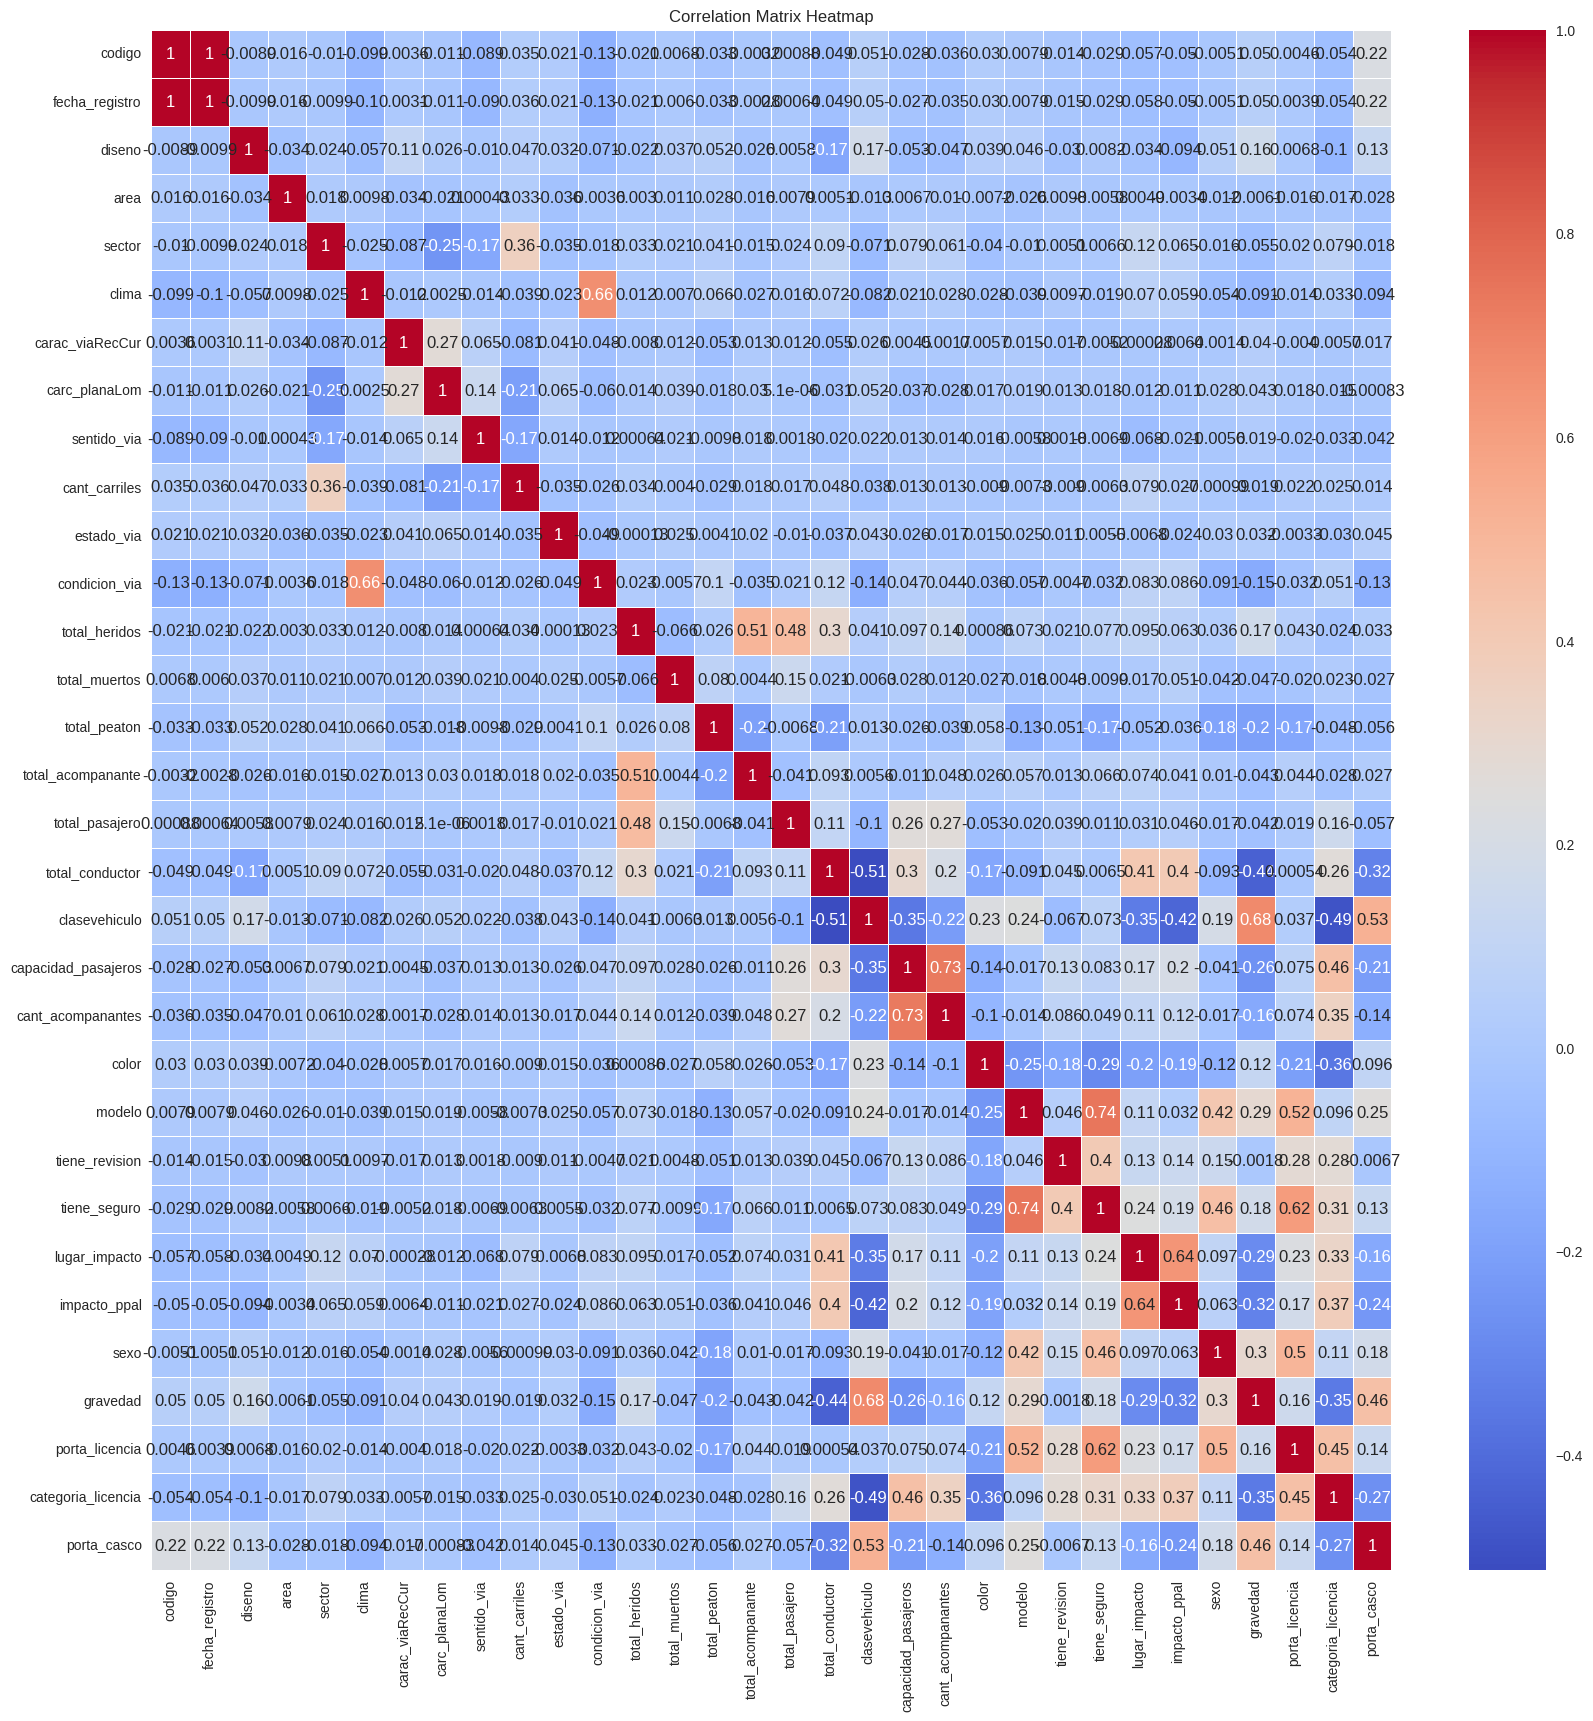

In [ ]:
correlation_matrix = df_labeled.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Observaciones:

* La matriz de correlación muestra que características como total_acompanantes, total_pasajeros y total_conductor tienen fuertes correlaciones positivas con total_heridos.

* En particular, caracteristicas como modelo , color , categoria licencia, tiene una leve correlacion con total_heridos.

* la caracteristica gravedad tiene algo de correlacion con total_heridos



# Tratamiento para las caracteristicas numéricas

# Distribución para las caracteristicas numéricas:



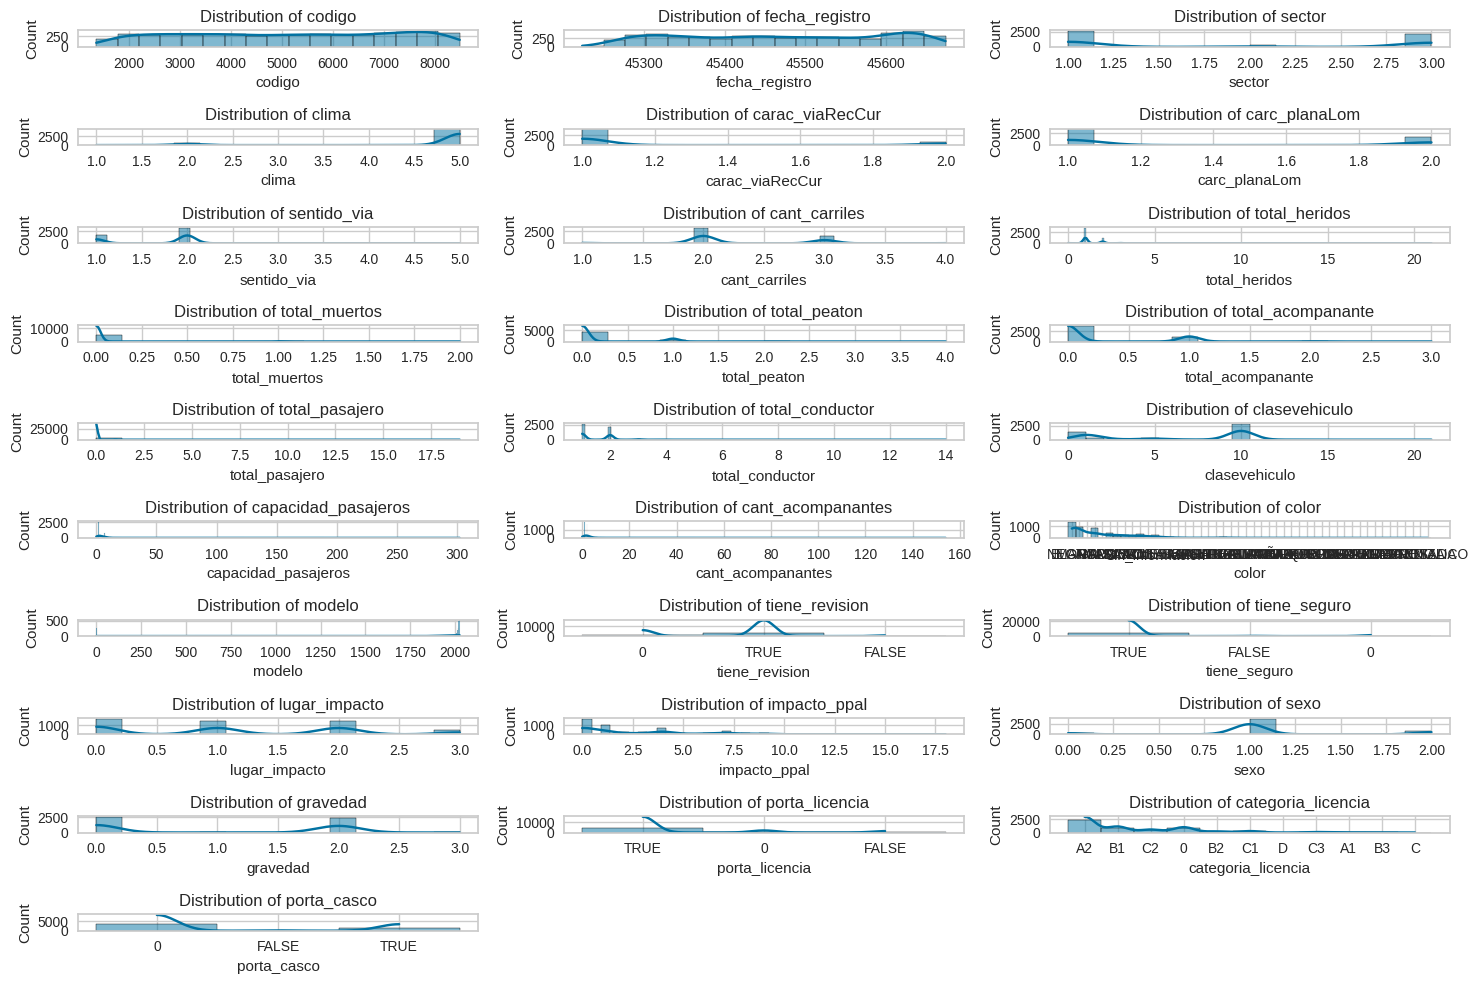

In [ ]:
df_labeled = df_labeled.select_dtypes(include=['number'])

plt.figure(figsize=(15, 10))

num_vars = len(df_labeled.columns)

for i, var in enumerate(df_labeled.columns, 1):
    plt.subplot((num_vars // 3) + 1, 3, i)
    sns.histplot(data=df, x=var, kde=True)
    plt.title(f'Distribution of {var}')

plt.tight_layout()
plt.show()

# Conclusiones generales de los graficos de distribucion normal generados:

La mayoría de las características son dominios.

muchas caracteristicas se observa que la mayoria de los valores son en un mismo valor , como diseno, iluniniacion via, condicion via.

Características como dominios pueden no aportar mucho a el modelo

# Formas de visualizar las correlaciones entre las variables independientes y variable dependiente

In [ ]:
df_labeled

codigo  fecha_registro  sector  clima  carac_viaRecCur  carc_planaLom  \
0       1380               2     1.0      5              1.0            2.0   
1       1357               0     1.0      5              1.0            2.0   
2       1370               1     3.0      5              1.0            1.0   
3       1435               6     1.0      5              1.0            2.0   
4       1424               5     3.0      5              1.0            2.0   
...      ...             ...     ...    ...              ...            ...   
4995    8343             429     1.0      5              1.0            1.0   
4996    8344             429     3.0      5              1.0            1.0   
4997    8480             435     1.0      5              1.0            2.0   
4998    8483             435     2.0      5              1.0            1.0   
4999    8436             434     1.0      5              1.0            2.0   

      sentido_via  cant_carriles  total_heridos  total_muertos  ...  modelo  \
0             2.0            2.0              1              0  ...      49   
1             1.0            2.0              2              0  ...      42   
2             2.0            2.0              3              0  ...      46   
3             2.0            2.0              2              0  ...      47   
4             2.0            3.0              1              0  ...      39   
...           ...            ...            ...            ...  ...     ...   
4995          2.0            2.0              1              0  ...       0   
4996          1.0            3.0              1              0  ...      37   
4997          2.0            2.0              2              0  ...      33   
4998          1.0            3.0              2              0  ...      41   
4999          2.0            2.0              2              0  ...      45   

      tiene_revision  tiene_seguro  lugar_impacto  impacto_ppal  sexo  \
0                  0             2              0             0     1   
1                  2             2              2             1     1   
2                  2             2              1             1     1   
3                  0             2              3             9     1   
4                  2             2              2             7     1   
...              ...           ...            ...           ...   ...   
4995               0             0              0             0     0   
4996               2             2              0             0     1   
4997               2             2              1             4     1   
4998               2             2              1             0     1   
4999               2             2              1             4     1   

      gravedad  porta_licencia  categoria_licencia  porta_casco  
0            2               2                   2            0  
1            0               2                   3            0  
2            2               2                   2            1  
3            0               0                   3            0  
4            0               2                   8            0  
...        ...             ...                 ...          ...  
4995         0               0                   0            0  
4996         0               2                   8            0  
4997         2               1                   2            2  
4998         2               2                   2            2  
4999         2               2                   2            2  

[5000 rows x 28 columns]

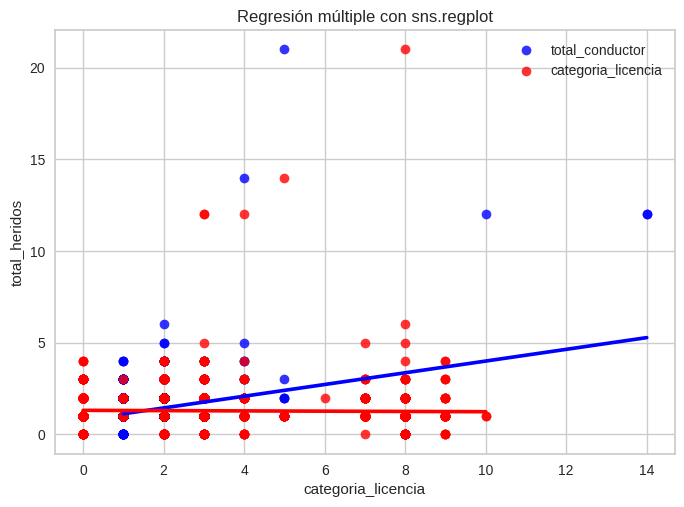

In [ ]:
# Checkear la correlación entre las caracteristicas independiente como (engine_size) y la variable objetivo (co2_emissions)
sns.regplot(x=df_labeled["total_conductor"], y=df_labeled["total_heridos"], scatter=True, label="total_conductor", color='blue', data=df_labeled, ci=None)
sns.regplot(x=df_labeled["categoria_licencia"], y=df_labeled["total_heridos"], scatter=True, label="categoria_licencia", color='red', data=df_labeled, ci=None)


plt.legend()
plt.title("Regresión múltiple con sns.regplot")
plt.show()

Comentarios:
* En el gráfico, los puntos se alinean en torno a una línea recta. Esto sugiere que el modelo tiene un desempeño aceptable.
* Calcular y mostrar métricas como MAE, MSE o
𝑅
2
  para reforzar con números lo que se observa visualmente.
* Tener en cuenta que este tipo de análisis es opcional, y se puede realizar entre las variables predictoras (independientes) con relación a la variable a predecir (Objetivo) con el objetivo de visualizar cómo puede influir durante el entrenamiento.


# 3. PIPELINE/DIVISÓN DE DATOS
**EXPERIMENTO 1**

In [ ]:
# Dividir la variable caractersiticas elegida como independiente y la variable objetivo para correr el algoritmo de Linear Regresssion

#X = df_labeled[["clasevehiculo","capacidad_pasajeros","totalconductor", "totalacompanante"]]
#X = df_labeled[["clasevehiculo","capacidad_pasajeros","totalconductor", "totalacompanante","sector","gravedad","color","modelo","revision","seguro","portalicencia","categorialicencia","casco","totalpasajero", "impacto","lugarimpacto","10","diseno","arr_geometricasa","arr_geometricasb","arr_carril","arr_iluminiacion","barrio"]]
#X = df_labeled[["clasevehiculo","capacidad_pasajeros","total_conductor", "total_acompanante","sector","gravedad","color","modelo","tiene_revision","tiene_seguro","porta_licencia","categoria_licencia","porta_casco","total_pasajero", "impacto_ppal","lugar_impacto","sexo"]]

X = df_labeled[["capacidad_pasajeros","total_conductor", "total_acompanante","total_pasajero","total_peaton","sector","gravedad","carac_viaRecCur","carc_planaLom","sentido_via","cant_carriles"]]

y = df_labeled["total_heridos"]

In [ ]:
# train_test_split -> Sirve para dividir los datos en conjuntos de entrenamiento y prueba de forma aleatoria.
from sklearn.model_selection import train_test_split

#La función train_test_split(X, y, ...) divide estos datos en cuatro variables:
# X_train	80% de X	Para entrenar el modelo
# X_test	20% de X	Para evaluar el modelo
# y_train	80% de y	Las etiquetas de X_train
# y_test	20% de y	Las etiquetas de X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Explicacion de Random State
# random_state fija la aleatoriedad en la división de datos.
# Permite obtener siempre la misma división al ejecutar el código.
# No tiene que ser 42, puedes usar cualquier número.
# Si no lo defines, cada vez que ejecutes el código, la división será diferente.

In [ ]:
# Mostrar el tamaño de los DataSets Resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


# 4. PIPELINE/SELECCIÓN Y CONSTRUCCIÓN DEL MÓDELO

In [ ]:
# Utilizo la libreria de SKLearn para hacer el llamado del algortimo en especifico que nos sirve para aplicar regresiones.
#from sklearn.ensemble import RandomForestClassifier
#model = RandomForestClassifier(n_estimators=100, random_state=42)
#model.fit(X_train, y_train)

#from sklearn.linear_model import Lasso
#model = Lasso(alpha=0.1)
#model.fit(X_train, y_train)

#from sklearn.linear_model import ElasticNet
#model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio controla la combinación L1/L2
#model.fit(X_train, y_train)

#from sklearn.linear_model import HuberRegressor
#model = HuberRegressor()
#model.fit(X_train, y_train)

#from sklearn.svm import SVR
#model = SVR(kernel='linear')  # También puedes usar 'poly', 'rbf' o 'sigmoid'
#model.fit(X_train, y_train)


from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)


RandomForestRegressor()

# 5. PIPELINE/ENTRENAR EL MÓDELO

In [ ]:
# TIP TIP : Fit es el metodo que nos permite entrenar los datos que tenemos eligiendo previamente un model, notese que tomamos lo sets de entrenamiento
model.fit(X_train, y_train)

RandomForestRegressor()

# 6. PIPELINE/EVALUACIÓN DEL MÓDELO

In [ ]:
# TIP TIP : Predict, Hace Predecciones usando el set de prueba
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

Explicación y_train_pred:



*  Usamos el modelo ya entrenado para hacer predicciones en los mismos datos con los que aprendió (X_train).
*  y_train_pred contendrá los valores predichos para cada ejemplo en X_train.
* Podemos comparar estos valores con y_train (los valores reales) para ver qué tan bien aprendió el modelo.

Explicación y_pred:

* Usamos el modelo entrenado para predecir los valores de y para los datos nunca antes vistos (X_test).
* y_pred contendrá los valores predichos para cada ejemplo en X_test.
* Luego podemos comparar y_pred con y_test (los valores reales) para evaluar qué tan bien generaliza el modelo en nuevos datos.







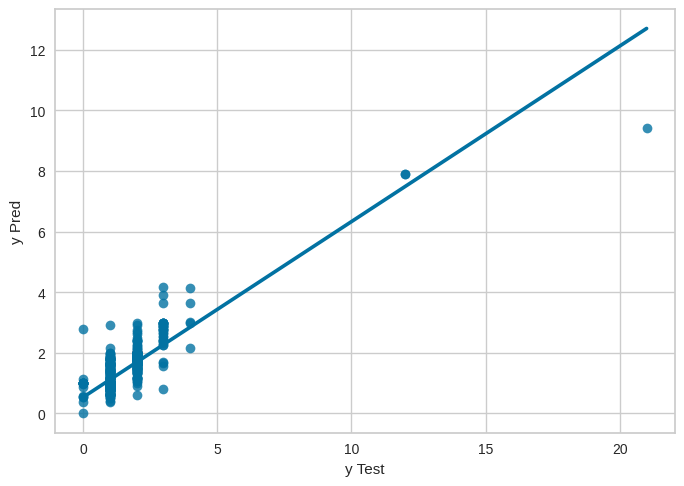

In [ ]:
# Graficamos los valores reales en el set de pruebas vs los valores que el módelo predijo
sns.regplot(x=y_test, y=y_pred, ci=None)
plt.xlabel('y Test')
plt.ylabel('y Pred')
plt.show()

In [ ]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare

Actual      pred  residual
1501       4  2.950000  1.050000
2586       1  0.800000  0.200000
2653       2  2.230000 -0.230000
1055       1  1.000000  0.000000
705        1  1.000000  0.000000
...      ...       ...       ...
4711       1  1.000000  0.000000
2313       2  1.814719  0.185281
3214       1  1.000000  0.000000
2732       2  1.949281  0.050719
1926       1  0.999091  0.000909

[1000 rows x 3 columns]

# Evaluar el Módelo con métricas de Performance

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [ ]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr_score

linear_train  linear_test
R2        0.879705     0.709059
mae       0.093699     0.177793
mse       0.047975     0.278459
rmse      0.219032     0.527693

# Ahora entendamos que quieren decir estas métricas:

# **R 2 -> (Coeficiente de determinación)**

Valor:
Entrenamiento: 0.879057
Prueba: 0.709392
Interpretación:
Este valor mide qué proporción de la variabilidad en el conjunto de datos está explicada por el modelo. Un 𝑅2
cercano a 1 indica un modelo que explica bien los datos; un valor cercano a 0 indica que el modelo no logra capturar la relación entre las variables.
En este caso, el modelo está explicando aproximadamente el 71%, se observa una diferencia entre el train y test, pero en general para ambos, el R2 indica que el modelo tiene un buen ajuste, pero no es perfecto.

# **MAE (Error absoluto medio)**

Valor:
Entrenamiento: 0.093134
Prueba: 0.177477
Interpretación:
El MAE mide el error promedio entre las predicciones del modelo y los valores reales. Es fácil de interpretar porque está en las mismas unidades que la variable objetivo.
Un error promedio de alrededor de 10 significa que, en promedio, el modelo se desvía 10 unidades del valor real.
* Dado que el MAE es similar en entrenamiento y prueba, esto sugiere nuevamente que el modelo está generalizando bien.

# **MSE (Error cuadrático medio)**
Valor:
Entrenamiento: 0
Prueba: 949.99
Interpretación:
El MSE mide el promedio de los errores al cuadrado. Penaliza errores grandes más que el MAE, lo que lo hace más sensible a valores atípicos.
Aunque es más difícil de interpretar directamente (ya que está en unidades al cuadrado), es útil para detectar si el modelo está cometiendo grandes errores.

* El MSE entre entrenamiento y prueba es consistente, lo cual refuerza la idea de que el modelo no está sobreajustando ni subajustando.

# **RMSE (Raíz del error cuadrático medio)**
Valor:
Entrenamiento: 30.69
Prueba: 30.82
Interpretación:
El RMSE es la raíz cuadrada del MSE, lo que lo convierte en una métrica en las mismas unidades que la variable objetivo, facilitando su interpretación.
Un RMSE de aproximadamente 30 significa que, en promedio, el modelo tiene un error de predicción de 30 unidades.

* Dado que el RMSE es mayor que el MAE, esto indica que hay algunos errores más grandes que están influyendo en la métrica.

# **EN GENERAL**

* Las métricas son similares en ambos conjuntos, lo cual es una señal de que el modelo no está sobreajustando ni subajustando. Esto es ideal para un modelo bien entrenado.

# Aunque el modelo tiene un desempeño razonable, todavía hay un margen para reducir los errores (MAE, MSE, RMSE). Esto podría lograrse mediante:
* Ajuste de hiperparámetros.
* Inclusión de más variables predictoras relevantes.
* Transformaciones en los datos.

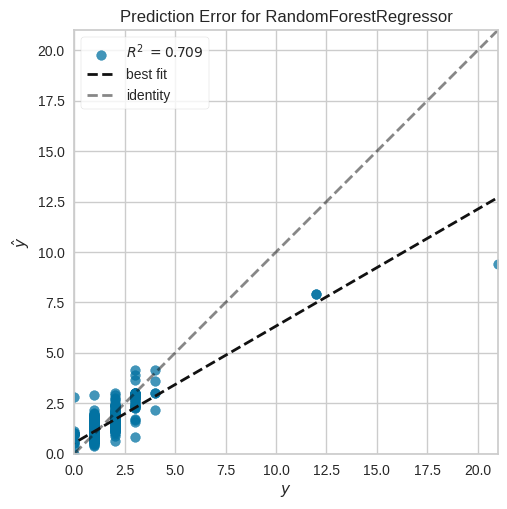

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

#model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Mostrar los datos de prueba
visualizer.score(X_test, y_test)  # Evaluar el modelo en estos datos de prueba
visualizer.show()                 # Mostrar la gráfica

# Aplicar Algoritmo de Linear Regression (Ejercicio que hace uso de varias variables independientes para predecir)
**EXPERIMENTO 2 - POR CADA EXPERIMENTO NUEVO REPETIR LOS PASOS QUE 3,4,5,6**

In [ ]:

primera_fila = X_test.iloc[0]
primera_fila

capacidad_pasajeros    15.0
total_conductor         3.0
total_acompanante       2.0
total_pasajero          0.0
total_peaton            1.0
sector                  1.0
gravedad                0.0
carac_viaRecCur         2.0
carc_planaLom           2.0
sentido_via             2.0
cant_carriles           2.0
Name: 1501, dtype: float64

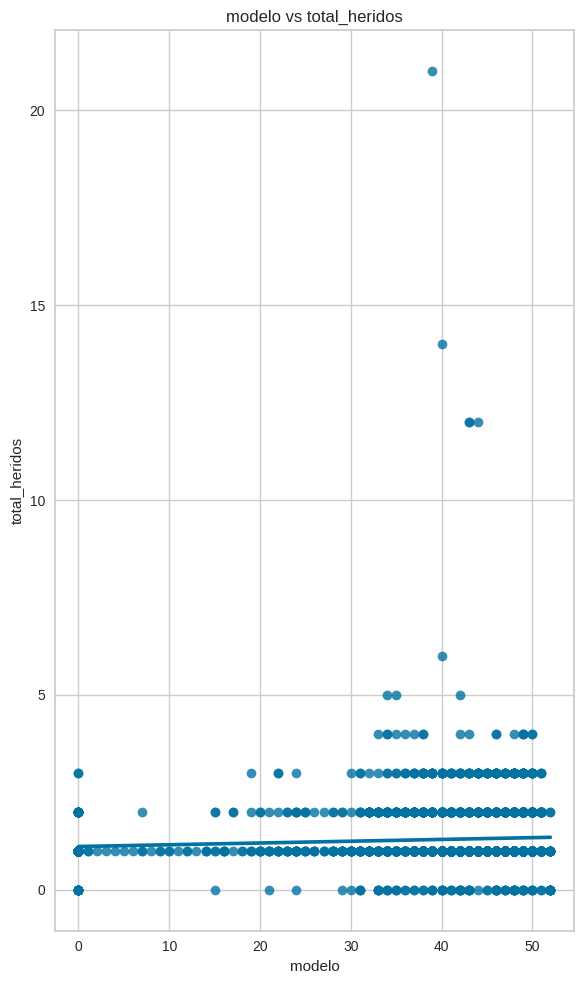

In [ ]:
# Ver la relación entre las caracteristicas independientes y la variable objetivo (dependiente)
independent_variables = ['modelo']
target_variable = 'total_heridos'

plt.figure(figsize=(6,10))

for i, var in enumerate(independent_variables):
    plt.subplot(1,1, i + 1)
    sns.regplot(x=df_labeled[var], y=df_labeled[target_variable])
    plt.title(f'{var} vs {target_variable}')

plt.tight_layout()
plt.show()

**REGRESION** **lINEAL**

Modelo 2

In [ ]:
# Dividir la variable caractersiticas elegida como independiente y la variable objetivo para correr el algoritmo de Linear Regresssion

#X = df_labeled[["clasevehiculo","capacidad_pasajeros","totalconductor", "totalacompanante"]]
#X = df_labeled[["clasevehiculo","capacidad_pasajeros","totalconductor", "totalacompanante","sector","gravedad","color","modelo","revision","seguro","portalicencia","categorialicencia","casco","totalpasajero", "impacto","lugarimpacto","10","diseno","arr_geometricasa","arr_geometricasb","arr_carril","arr_iluminiacion","barrio"]]
#X = df_labeled[["capacidad_pasajeros","total_conductor", "total_acompanante","sector","gravedad","total_pasajero", "impacto_ppal","lugar_impacto"]]

X = df_labeled[["capacidad_pasajeros","total_conductor", "total_acompanante","total_pasajero","total_peaton","sector","gravedad","carac_viaRecCur","carc_planaLom","sentido_via","cant_carriles"]]

y = df_labeled["total_heridos"]



In [ ]:
# train_test_split -> Sirve para dividir los datos en conjuntos de entrenamiento y prueba de forma aleatoria.
from sklearn.model_selection import train_test_split

#La función train_test_split(X, y, ...) divide estos datos en cuatro variables:
# X_train	80% de X	Para entrenar el modelo
# X_test	20% de X	Para evaluar el modelo
# y_train	80% de y	Las etiquetas de X_train
# y_test	20% de y	Las etiquetas de X_test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Explicacion de Random State
# random_state fija la aleatoriedad en la división de datos.
# Permite obtener siempre la misma división al ejecutar el código.
# No tiene que ser 42, puedes usar cualquier número.
# Si no lo defines, cada vez que ejecutes el código, la división será diferente.

In [ ]:
# Mostrar el tamaño de los DataSets Resultantes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4000, 11)
X_test shape: (1000, 11)
y_train shape: (4000,)
y_test shape: (1000,)


In [ ]:
# Utilizo la libreria de SKLearn para hacer el llamado del algortimo en especifico que nos sirve para aplicar regresiones.
from sklearn.linear_model import LinearRegression
model_simple_lin_reg = LinearRegression()

In [ ]:
# prompt: contar cuantos nulos tiene el data set X

# Display the number of nulls per column in the DataFrame 'df_labeled'.
null_counts = df_labeled.isnull().sum()
null_counts


codigo                 0
fecha_registro         0
sector                 0
clima                  0
carac_viaRecCur        0
carc_planaLom          0
sentido_via            0
cant_carriles          0
total_heridos          0
total_muertos          0
total_peaton           0
total_acompanante      0
total_pasajero         0
total_conductor        0
clasevehiculo          0
capacidad_pasajeros    0
cant_acompanantes      0
color                  0
modelo                 0
tiene_revision         0
tiene_seguro           0
lugar_impacto          0
impacto_ppal           0
sexo                   0
gravedad               0
porta_licencia         0
categoria_licencia     0
porta_casco            0
dtype: int64

In [ ]:
# TIP TIP : Fit es el metodo que nos permite entrenar los datos que tenemos eligiendo
# previamente un model, notese que tomamos lo sets de entrenamiento
model_simple_lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# TIP TIP : Predict, Hace Predecciones usando el set de prueba
y_train_pred = model_simple_lin_reg.predict(X_train) # Datos conocidos
y_pred = model_simple_lin_reg.predict(X_test) # Datos no conocidos

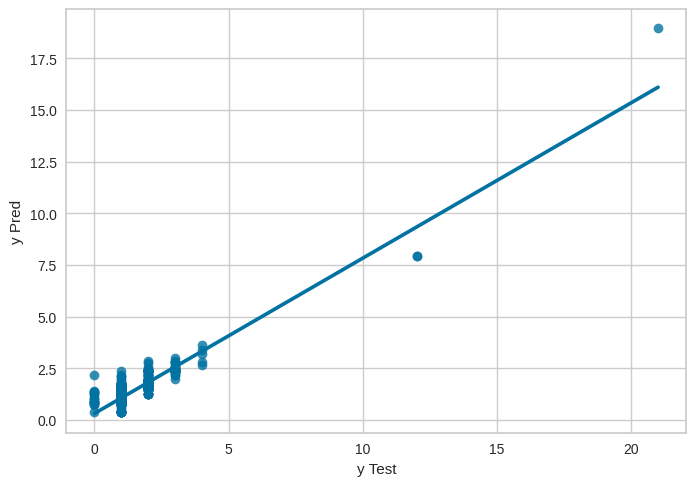

In [ ]:
# Graficamos los valores reales en el set de pruebas vs los valores que el módelo predijo
sns.regplot(x=y_test, y=y_pred, ci=None)
plt.xlabel('y Test')
plt.ylabel('y Pred')
plt.show()

In [ ]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test - y_pred}
compare = pd.DataFrame(my_dict)
compare

Actual      pred  residual
1501       4  3.649558  0.350442
2586       1  0.729265  0.270735
2653       2  2.469365 -0.469365
1055       1  0.833101  0.166899
705        1  1.043769 -0.043769
...      ...       ...       ...
4711       1  1.077085 -0.077085
2313       2  1.521231  0.478769
3214       1  0.979788  0.020212
2732       2  1.912496  0.087504
1926       1  1.072796 -0.072796

[1000 rows x 3 columns]

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, i):

    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }

    return pd.DataFrame(scores)

In [ ]:
slr_score = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr_score

linear_train  linear_test
R2        0.705815     0.841434
mae       0.228929     0.238876
mse       0.117324     0.151763
rmse      0.342526     0.389568

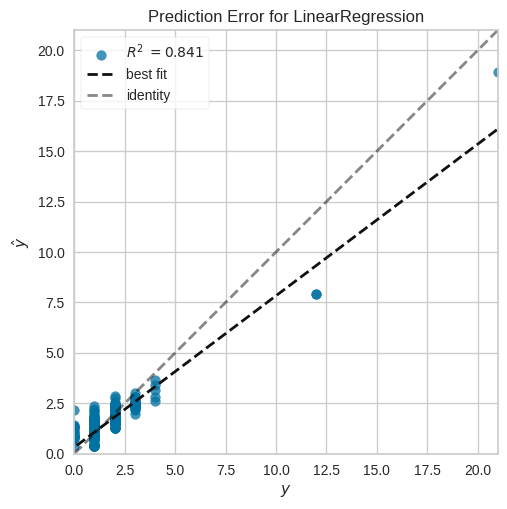

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

#model = LinearRegression()

visualizer = PredictionError(model_simple_lin_reg)
visualizer.fit(X_train, y_train)  # Mostrar los datos de prueba
visualizer.score(X_test, y_test)  # Evaluar el modelo en estos datos de prueba
visualizer.show()                 # Mostrar la gráfica

# <h1> Exportacion </h1>



In [ ]:
import pickle

In [ ]:
 ## save like h5, pkl, lib file
import pickle
pickle.dump(model,open('/content/prediccion_heridos.pkl','wb'))


In [ ]:
# load model

model=pickle.load(open('/content/prediccion_heridos.pkl','rb'))
print(model.predict([[2,1,1,0,1,3,2,1,1,2,2]]))

#X = df_labeled[["capacidad_pasajeros","total_conductor", "total_acompanante","total_pasajero","total_peaton","sector","gravedad","carac_viaRecCur","carc_planaLom","sentido_via","cant_carriles"]]

[3.]


In [ ]:
# prompt: listar del dataset df_labeled las columnas ["capacidad_pasajeros","total_conductor", "total_acompanante","total_pasajero","total_peaton","sector","gravedad","carac_viaRecCur","carc_planaLom","sentido_via","cant_carriles"]]

df_labeled[["capacidad_pasajeros","total_conductor", "total_acompanante","total_pasajero","total_peaton","sector","gravedad","carac_viaRecCur","carc_planaLom","sentido_via","cant_carriles","total_heridos"]]


capacidad_pasajeros  total_conductor  total_acompanante  total_pasajero  \
0                     2.0                1                  0               0   
1                     4.0                2                  1               0   
2                     2.0                1                  1               0   
3                     7.0                2                  1               0   
4                     4.0                2                  0               0   
...                   ...              ...                ...             ...   
4995                  2.0                2                  0               0   
4996                 31.0                1                  0               1   
4997                  2.0                2                  0               0   
4998                  2.0                1                  1               0   
4999                  2.0                1                  0               0   

      total_peaton  sector  gravedad  carac_viaRecCur  carc_planaLom  \
0                0     1.0         2              1.0            2.0   
1                0     1.0         0              1.0            2.0   
2                1     3.0         2              1.0            1.0   
3                0     1.0         0              1.0            2.0   
4                0     3.0         0              1.0            2.0   
...            ...     ...       ...              ...            ...   
4995             1     1.0         0              1.0            1.0   
4996             0     3.0         0              1.0            1.0   
4997             0     1.0         2              1.0            2.0   
4998             0     2.0         2              1.0            1.0   
4999             1     1.0         2              1.0            2.0   

      sentido_via  cant_carriles  total_heridos  
0             2.0            2.0              1  
1             1.0            2.0              2  
2             2.0            2.0              3  
3             2.0            2.0              2  
4             2.0            3.0              1  
...           ...            ...            ...  
4995          2.0            2.0              1  
4996          1.0            3.0              1  
4997          2.0            2.0              2  
4998          1.0            3.0              2  
4999          2.0            2.0              2  

[5000 rows x 12 columns]

In [ ]:
# Mostrar las nuevas columnas renombradas
df.columns

Index(['codigo', 'fecha_registro', 'diseno', 'area', 'sector', 'zona', 'clima',
       'carac_viaRecCur', 'carc_planaLom', 'sentido_via', 'cant_carriles',
       'estado_via', 'condicion_via', 'iluminacion_via', 'barrio',
       'total_heridos', 'total_muertos', 'total_peaton', 'total_acompanante',
       'total_pasajero', 'total_conductor', 'clasevehiculo',
       'capacidad_pasajeros', 'cant_acompanantes', 'color', 'modelo',
       'tiene_revision', 'tiene_seguro', 'lugar_impacto', 'impacto_ppal',
       'sexo', 'gravedad', 'porta_licencia', 'categoria_licencia',
       'porta_casco'],
      dtype='object')

# Conclusión y recomendaciones de los Profe:

Estos hallazgos sugieren que eliminar algunas características altamente correlacionadas puede ayudar a reducir la multicolinealidad y mejorar el rendimiento del modelo.

Formas de solucionarla:

1. Eliminar una de las variables correlacionadas: Si dos variables contienen información redundante, puedes elegir quedarte con una.
2. Usar técnicas de reducción de dimensionalidad: Métodos como PCA (Análisis de Componentes Principales) pueden combinar variables correlacionadas en una sola.
3. Regularización: Técnicas como Ridge Regression o Lasso pueden manejar multicolinealidad al penalizar los coeficientes del modelo.
4. Adicionar informacion de huecos y señales de transito y datos del accidente